# Проект "Анализ рынка компьютерных игр"

## Введение и описание проекта

Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Имеются данные до 2016 года. Предположим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Отработаем принцип работы с данными на основе исторических данных, дабы в дальнейшем использовать для возможных прогнозов на актуальных данных.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### План работы

* **Шаг 1**. Загрузка данных и изучение основных параметров

* **Шаг 2**. Подготовка данных: преобразование названий столбцов, типов данных, пропусков. Дополнение данных для исследования.

* **Шаг 3**. Исследовательский анализ данных:
    Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?
    Как менялись продажи по платформам? Как распределяются продажи по платформам с годами? За какой характерный срок появляются новые и исчезают старые платформы?
    Определение актуального периода исследования для построения прогноза.
    Какие платформы лидируют по продажам, растут или падают? 
    Как распределены глобальные продажи игр в разбивке по платформам?
   Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков? Какова корреляция между отзывами и продажами. 
    Соотносятся ли выводы с продажами игр на других платформах?
    Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
    
* **Шаг 4**. Портрет пользователя каждого региона
    Определить для пользователя каждого региона (NA, EU, JP):
    Самые популярные платформы (топ-5). Причины такого распределения.
    Самые популярные жанры (топ-5). Почему разные жанры популярны в разных регионах?
    Влияет ли рейтинг ESRB на продажи в отдельном регионе?
    
* **Шаг 5**. Проверка гипотез:
    Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    Средние пользовательские рейтинги жанров Action и Sports разные.
    
* **Шаг 6**. Общий вывод

### Описание данных

-    Name — название игры
-    Platform — платформа
-    Year_of_Release — год выпуска
-    Genre — жанр игры
-    NA_sales — продажи в Северной Америке (миллионы проданных копий)
-    EU_sales — продажи в Европе (миллионы проданных копий)
-    JP_sales — продажи в Японии (миллионы проданных копий)
-    Other_sales — продажи в других странах (миллионы проданных копий)
-    Critic_Score — оценка критиков (максимум 100)
-    User_Score — оценка пользователей (максимум 10)
-    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*Данные за 2016 год могут быть неполными.*

## Загрузка и предобработка данных

### Загрузка библиотек и файла с данными

Первым делом загрузим библиотеки, необходимые в работе, и прочитаем датасет.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go 
import statistics as stats
from scipy import stats as st
! pip install phik
import phik
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv('games.csv')
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Приведем названия столбцов к единому виду со всеми строчными буквами.

In [3]:
df.columns = df.columns.str.lower()
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Предобработка данных, изменение типа, работа с пропусками и дубликатами

Сразу видно, что значение года имеет тип float64, поэтому приведем его к формату целого числа. Там, где есть пропуски - тип данных не меняем.

In [5]:
df['year_of_release'] = df['year_of_release'].astype(int, errors='ignore')

Аналогично переведем имеющиеся пользовательские оценки в формат float, пропуская отсутствующие или иные типы оценок.

In [6]:
df['user_score'] = df['user_score'].astype(int, errors='ignore')

Рассмотрим встречающиеся в датафрейме значения по каждой колонке.

In [7]:
for col in df.columns:
    display(df[col].value_counts())

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

0.00     4508
0.02      576
0.03      561
0.04      549
0.01      545
         ... 
3.68        1
2.98        1
2.61        1
3.04        1
41.36       1
Name: na_sales, Length: 402, dtype: int64

0.00     5870
0.01     1494
0.02     1308
0.03      926
0.04      709
         ... 
1.87        1
1.75        1
1.44        1
1.60        1
28.96       1
Name: eu_sales, Length: 307, dtype: int64

0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
        ...  
3.14        1
2.73        1
3.18        1
3.63        1
0.97        1
Name: jp_sales, Length: 244, dtype: int64

0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
2.11       1
7.53       1
1.21       1
1.79       1
0.93       1
Name: other_sales, Length: 155, dtype: int64

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
21.0      1
17.0      1
22.0      1
13.0      1
Name: critic_score, Length: 82, dtype: int64

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Видно, что в столбце пользовательских оценок есть значение TBD - это означает "To Be Determined", то есть, оценка игры еще не определена и будет выведена позже по получении достаточного количества оценок как таковых, либо на момент очередного среза рейтингов в будущем.

Как известно из новостей игрового мира сейчас, оценки игр в Steam, либо на любой другой платформе-маркетплейсе, могут как изменяться с течением времени и выходом новых патчей и дополнений, так и вообще не определяться в течение некоторого времени сразу после выхода игры, когда геймеры еще не успели полностью оценить игру.

Подсчитаем количество пропусков по каждому столбцу.

In [8]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Самые важные строки, которые содержат название игры и жанр. Поэтому для начала посмотрим, какие данные есть в строках с пропуском имени и жанра.

In [9]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в названиях и жанрах игр у двух записей, причем дополнительных данных, по которым косвенно можно определить название игры или ее жанр, - нет. Поэтому строки можно убрать.

In [10]:
df=df.dropna(subset=['name'])
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Ради интереса изучим пропуски в годах выхода игр и посмотрим, можно ли их заполнить данными.

In [11]:
df.loc[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Значений с пропуском года достаточно много. Однако, заполнять пропуски, скорее всего, может прийтись вручную. 269 записей с пропусками можно заполнять руками в течение многих дней, а работа требует быть сделанной сейчас. Более того, совершенно не факт, что в интернете будет корректная информация по годам выхода игр. Поэтому, к сожалению, от этих пропусков также можно избавиться.

In [12]:
df=df.dropna(subset=['year_of_release'])
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

**Пропуски оценок критиков, оценок пользователей.** Невозможно определить рейтинг игры, не зная, на какой платформе рейтинг формируется (Rotten Tomatoes может давать одно, MetaCritic - другое, Steam/Origin/Battle.net/ EGS - третье). С другой стороны, заполнять значением TBD (To Be Determined - "Будет определено") нелогично с точки зрения исследования, поскольку станет невозможным определить отдельные показатели и их зависимость. Поэтому числовые значения в оценках пользователей и критиков заполнять не будем, и наоборот - заменим оценку TBD на NaN для того, чтобы была возможность подсчитать зависимость продажи игры от ее рейтинга. 

**Рейтинг ESRB** вообще мог не присваиваться играм по той или иной причине (однако, это, в свою очередь, может означать, что на рынок США для такой игры путь будет закрыт), либо до сих пор не присвоен. В этой связи, можем заполнить пропуски в rating значением no_ESRB, что будет указывать на то, что для такой игры нет соответствующего рейтинга.

In [13]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df['user_score']=pd.to_numeric(df['user_score'], errors='coerce')
df['rating'] = df['rating'].fillna(value='no_ESRB')
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Пропуски в данных заполнены. Теперь проверим данные на предмет наличия дубликатов. Поскольку платформ и жанров существует не так много, в каждый год может выходить множество игр и т.д., единственным местом, где могут быть дубликаты, будет колонка с названием игры.

In [14]:
df['name'].value_counts()

Need for Speed: Most Wanted               12
LEGO Marvel Super Heroes                   9
Ratatouille                                9
FIFA 14                                    9
Terraria                                   8
                                          ..
Loving Life with Hello Kitty & Friends     1
Scrabble (Others sales)                    1
Viva Pinata: Party Animals                 1
Sands of Destruction                       1
Haitaka no Psychedelica                    1
Name: name, Length: 11426, dtype: int64

При прочих равных условиях, убирать дубликаты не стоит: та же легендарная NFS:MW выходила и на PC, и на разных PS, XBox и прочих консолях, а также на мобильных платформах. Итого может набраться около 10-12 разных записей, что вяжется с полученными данными. То же самое и с разными спортивными играми серии FIFA/NHL/NFL: они весьма популярны на разных платформах.

Поэтому дубликаты убирать из датасета не будем - это может критически сказаться на наборе данных и не дать полной картины по платформам, жанрам, продажам и прочему.

Однако ради интереса посмотрим, на каких платформах выходила легенда.

In [15]:
df.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,no_ESRB
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,no_ESRB
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,no_ESRB
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Как оказалось, в датафрейме есть две разные версии NFS:MW: оригинал 2005 года и ремейк 2012 года. Поэтому для чистоты данных заменим название для более новой части на "Need for Speed: Most Wanted (2012)", как она обозначается на многих площадках.

In [16]:
df.loc[(df['name'] == 'Need for Speed: Most Wanted')&(df['year_of_release'] != 2005), 'name'] = 'Need for Speed: Most Wanted (2012)'
df.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E
6473,Need for Speed: Most Wanted,GBA,2005.0,Racing,0.19,0.07,0.00,0.00,NaN,8.3,E


Всего оригинальная и по праву любимая многими игра вышла на 7 платформах. При этом, здесь есть уже и такие умершие платформы как GameCube. Однако, жизненный цикл платформ - это совсем другая история.

Если с NFS:MW сложилась ситуация с некорректным занесением названия игры в датасет, то среди других игр могут быть дубликаты неявные, когда дублируются записи с одинаковым именем игры, названием платформы и годом выпуска.

In [17]:
duplicates = df[df.duplicated(['name', 'platform'])]
duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


Нашелся еще один дубликат, поэтому удалим его по индексу в датасете.

In [18]:
df = df.drop(index=[16230])

In [19]:
duplicates = df[df.duplicated(['name', 'platform'])]
duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Теперь дубликатов с одинаковой платформой и названием нет, поэтому работу с дубликатами считаем завершенной и переходим к следующему этапу.

### Дополнение исследуемых данных

Для дальнейшего анализа нам будет важно также иметь данные об общих продажах по миру для каждой игры, а также для укрупнения исследования можно дополнить данные отдельным столбцом по платформе. Учитывая имевшиеся на 2016 год платформы, это будет PC, XBox (оригинальный, 360 и One), PlayStation (PS 1-4, вместе с Portable и Vita), GameBoy (оригинальный, Advanced и 3DS), Nintendo Wii (Wii и WiiU), и все остальные платформы (Others). Современный игровой рынок имеет уже сформировавшуюся специфику характерных жанров для разных платформ: например, шутеры на консолях будут не так популярны как на ПК. Или разного рода адвенчуры и РПГ без сетевой составляющей могут быть популярны во многом на GameBoy, поскольку в них можно играть в дороге и вне доступа к сети.

Сами платформы тоже могут быть по-разному распространенными в разных странах, и это может показать дальнейший анализ. А в соответствии с распространенностью платформ может меняться и предпочтение игрока по жанрам.

Плюс, разные платформы имеют разную ценовую политику, и пользователь чаще может "голосовать рублем/долларом/йеной" при покупке игры. Поэтому важно рассматривать рынок игр не только в разрезе их самих, их оценок и жанров, но в том числе и платформ.

In [20]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [21]:
def cat_plat(row):
    platform = row['platform']
    ps = ['PS','PS2','PS3','PS4','PSP','PSV']
    xbox = ['XB', 'X360', 'XOne']
    wii = ['Wii', 'WiiU']
    gameboy = ['GB', 'GBA', 'DS', '3DS'] #стоит отметить, что хоть Nintendo DS и называется Nintendo, фактически она новая версия Gameboy
    if platform == 'PC':
        return 'PC'
    elif platform in (xbox) :
        return 'XBox'
    elif platform in(ps):
        return 'PlayStation'
    elif platform in(wii):
        return 'Wii'
    elif platform in(gameboy):
        return 'GameBoy'
    else:
        return 'Other'

df['platform_gen'] = df.apply(cat_plat, axis=1)
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_gen
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Wii
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_ESRB,40.24,Other
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Wii
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Wii
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_ESRB,31.38,GameBoy
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no_ESRB,30.26,GameBoy
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,GameBoy
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,Wii
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32,Wii
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no_ESRB,28.31,Other


Теперь, имея укрупненные данные и дополненные данные по продажам игр по миру, можно приступать к анализу данных.

Мы подготовили данные, убрали неявные дубликаты, заменили пропуски там, где это возможно, а где это невозможно - убрали лишние данные или убрали ненужные строки. Также были исправлены недочеты в названии Need for Spee Most Wanted и игра разделена на две разные версии.

Дополнили данные двумя столбцами: суммарными продажами по миру и основной платформой (категориальный признак) в соответствии с актуальной ситуацией на игровом рынке на сегодняшний день.

## Исследовательский анализ данных

В данном разделе разберем основные параметры выборки данных, изучим различные метрики и в конце сформируем вывод о том, какая выборка и с какими параметрами должна использоваться при прогнозировании продаж.

При исследовании данных мы будем учитывать то, что количество проданных игр может зависеть от региона продажи, платформы, на которой игра выпускается, жанра игры. 

Платформа, на которой выпускается игра, в современных условиях является во многом определяющей. Игровые платформы можно разделить на несколько кластеров: 
1. Стационарные и портативные
2. Платформы по модели приставки

И если стационарные и портативные платформы не покажут текущей ситуации на рынке и возможные пути развития, то разделение по линейкам моделей платформ будет более репрезентативным. В первую очередь это обусловлено тем, что для каждой линейки производители на сегодняшний день не имеют единого магазина игр. Для PlayStation это PlayStation Store, для XBox это Microsoft Store, для Nintendo это My Nintendo Store, для ПК вообще существует множество разных площадок (Steam, Origin, EGS, GOG и другие). Каждая площадка ограничена только конкретной линейкой моделей, и поэтому изучать данные продаж как минимум в современных условиях необходимо именно в разрезе линеек, или укрупненных платформ, для чего в предыдущем разделе был создан столбец platform_gen.

Также, разные платформы могут иметь разную направленность игрового опыта. К примеру, в шутеры (Battlefield, Call of Duty, Counter Strike) максимально удобно будет играть на компьютере с клавиатурой и мышью. Возможно чуть менее удобно будет на XBox (поскольку консоль поддерживает более отлаженную модель использования клавиатуры и мыши), и еще менее удобно на PlayStation. Одновременно с этим, в условную RPG (например, Dark Souls) будет удобнее играть на консоли с геймпадом, чем на ПК без геймпада.

А на портативной консоли доминировать будут разного рода RPG и Action, где не нужно иметь огромный экран для наслаждения 4К графикой со всеми современными возможностями видеокарт. Например, легендарная игра Super Mario (1985 год) является самой продаваемой игрой современности и регулярно выходила на всех приставках Nintendo, практически так же как Legend of Zelda.

### Распределение выпуска игр по годам

В данном разделе рассмотрим выпуск игр по годам, причем дополнительно отразим на графике выпуск игр по годам для различных платформ.

In [22]:
pivot_year = df.pivot_table(index=['year_of_release', 'platform'], values='name',aggfunc='count').reset_index()
pivot_year.columns=['year', 'platform', 'count']
pivot_year

,year,platform,count
0,1980.0,2600,9
1,1981.0,2600,46
2,1982.0,2600,36
3,1983.0,2600,11
4,1983.0,NES,6
...,...,...,...
233,2016.0,PSV,85
234,2016.0,Wii,1
235,2016.0,WiiU,14
236,2016.0,X360,13


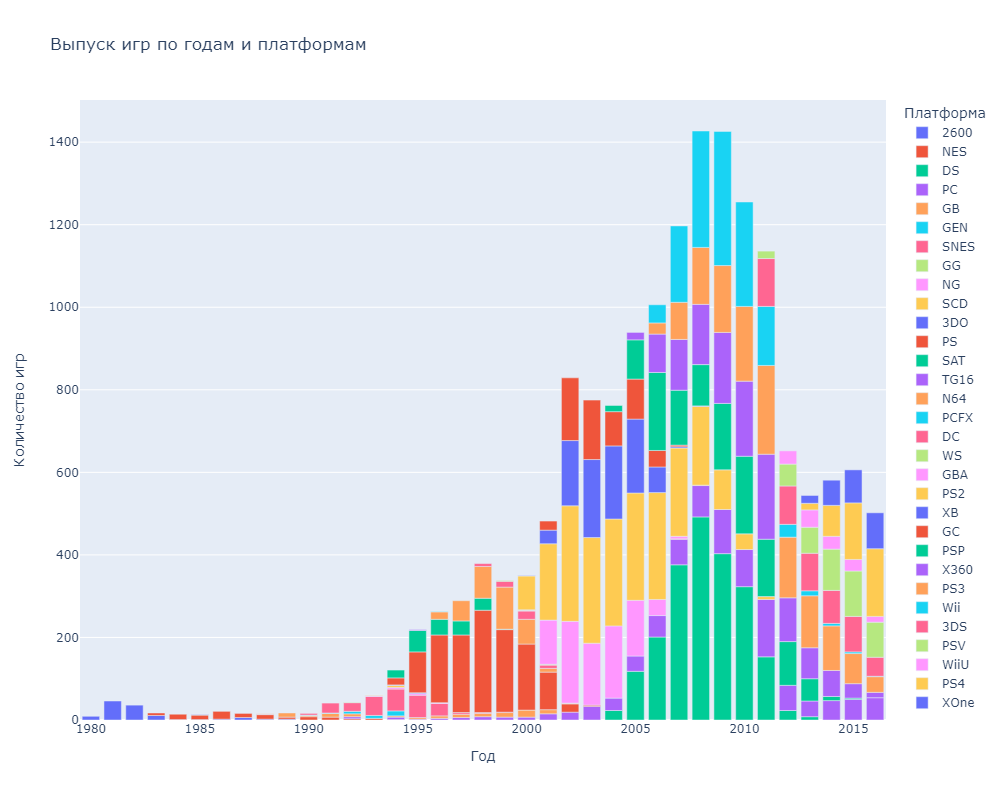

In [23]:
fig = px.bar(pivot_year, x="year", y="count", title='Выпуск игр по годам и платформам',color = 'platform')
fig.update_layout(width=1000,
                  height=800,
                  xaxis_title='Год',
                   yaxis_title='Количество игр',
                   legend_title="Платформа"
                 )
fig.show("png")

Интересно заметить, что с 1980 года количество выпускаемых игр выросло в сотни раз. При этом, если рассматривать диаграмму укрупненно, можно заметить, что в самом начале существования игрового рынка, лидер был единственный - Atari 2600. Затем, в 1983 году появилась NES (известная в России как Dendy) и до 1989 года она была фактически единственной игровой платформой (Atari показывает последние вышедшие игры в 1987).

В 1990 году рынок приставок расширился - появились уже и GameBoy и Genesis (она же Sega MegaDrive), а затем и SuperNES (она же SuperNintendo). Резкий рост обозначился в 1993-1994 годах, где на рынок вышла первая PlayStation, и до 2000 года она сохраняла доминирующее положение. Ей пыталась составить конкуренцию Sega Saturn, но после 2000 года она уже не получала игр вообще и ушла в небытие.

В 2000 году появилась PS2, следом за ней первый XBox и GameCube. Однако лидерство Sony оставалось непоколебимым. Примечательно, что в 2001 году появилось очень много (с дальнейшим ростом) игр для GameBoy Advanced - и можно считать, что тогда начался рост "мобильного гейминга" как такового, когда играть в игры стало возможно не только дома или в компьютерном клубе, но и в пути.

Только в 2004 году Sony выпустила мечту всех мальчишек России и СНГ того времени - PSP, и смогла составить конкуренцию Nintendo, но и тогда же вышла Nintendo DS, которая является следующий поколением GameBoy.

В 2005-2006 годах происходит смена поколений приставок: выпускаются XBox 360 и PS3, а следом за ними и Nintendo Wii. Многие игрожурналисты и эксперты писали о том, что тогда начала интенсифицироваться борьба между тремя мастодонтами игровой индустрии, Sony, Microsoft и Nintendo, но диаграмма явно показывает, что последние сосредоточились на своей действительно уникальной платформе DS и дополнительно выпустили Wii. Как считается, компания сосредоточилась на казуальной части геймеров, не участвуя в гонке за ААА-проектами между Microsoft и Sony.

В 2011 году было выпущено больше всего игр для ПК, чем за все остальные годы для него же. При этом для консолей игр выходило все равно больше. К этому моменту релизы стали многоплатформенными, и выходили уже на нескольких платформах, но тем не менее результаты вполне очевидны.

В 2013 году произошла очередная смена поколений приставок, и появились XBox One и PS4. Здесь и далее, зная историю рынка, можно практически с 90% уверенностью считать, что если игра вышла на ПК, то она вышла и на XBox и на PS.

До 2016 года можно уже наблюдать закат платформ PS3 и XBox 360, по мере того как они замещаются новым поколением, все меньше игр их поддерживают. А так называемые "ПК-бояре" с 2013 года получают по примерно 50 новых релизов на своей платформе. Доминирующее положение же занимают XBox и PS, с двукратным перевесом последней, поскольку на платформе Microsoft практически не бывает эксклюзивов, в то время как понятие "Сони-эксклюзив" после 2016 года стало все более употребимым.

**Вывод**

На основании полученной диаграммы можно наглядно проследить этапы развития игрового рынка, а также увидеть, что игровые платформы часто сменяли друг друга примерно каждые 9 лет. Соответственно, для минимально реалистичного анализа и прогноза на будущий период, следует брать данные не более чем за 3 года до рассматриваемого периода. Однако, если срок жизни одной из платформ приближается к 8-10 годам, следует делать очень осторожные прогнозы ввиду неизвестности популярности новой платформы.

### Распределение продаж игр по платформам

С учетом вышеописанного, изучим распределение продаж игр по платформам за последние 3 года. В условиях текущего анализа это 2014, 2015 и 2016 года. Этот период удобен также и тем, что в 2013 году произошла смена поколений двух лидеров рынка игра XBox и PlayStation, и поэтому на основании этих данных можно будет построить прогноз на дальнейший год.

In [24]:
df_3yr = df.query('year_of_release >= 2014')
df_3yr.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_gen
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_ESRB,14.63,PlayStation
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,PlayStation
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_ESRB,11.68,GameBoy
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,PlayStation
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_ESRB,7.98,PlayStation


Теперь построим сводные таблицы и sunburst-диаграммы по продажам игр по платформам и регионам, используя укрупненные наименования платформ. Это делается в той связи, что исторически к этому моменту уже сложились своеобразные касты "ПК-бояр", "Коробочников", "Сонибоев" и любителей Nintendo. Поэтому вполне логично рассматривать продажи именно в разрезе этих больших групп.

In [25]:
pivot_3yr_2014 = df_3yr.query('year_of_release == 2014').pivot_table(index=['platform_gen'], values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'], aggfunc='sum').reset_index()
pivot_3yr_2014.columns=['platform', 'EU', 'Japan', 'North America','Other','total']
pivot_3yr_2014

,platform,EU,Japan,North America,Other,total
0,GameBoy,8.73,20.69,12.33,2.01,43.76
1,PC,8.87,0.00,3.51,0.90,13.28
2,PlayStation,67.19,15.59,53.12,24.00,159.90
3,Wii,8.52,3.19,12.09,1.98,25.78
4,XBox,29.43,0.22,51.22,7.94,88.81


In [26]:
melted = pivot_3yr_2014.melt(id_vars='platform', value_vars=['EU', 'Japan', 'North America', 'Other'], var_name='region', value_name='sales')
melted = melted.rename(columns={'platform': 'platform', 'region': 'region', 'sales': 'sales'})
melted

,platform,region,sales
0,GameBoy,EU,8.73
1,PC,EU,8.87
2,PlayStation,EU,67.19
3,Wii,EU,8.52
4,XBox,EU,29.43
5,GameBoy,Japan,20.69
6,PC,Japan,0.00
7,PlayStation,Japan,15.59
8,Wii,Japan,3.19
9,XBox,Japan,0.22


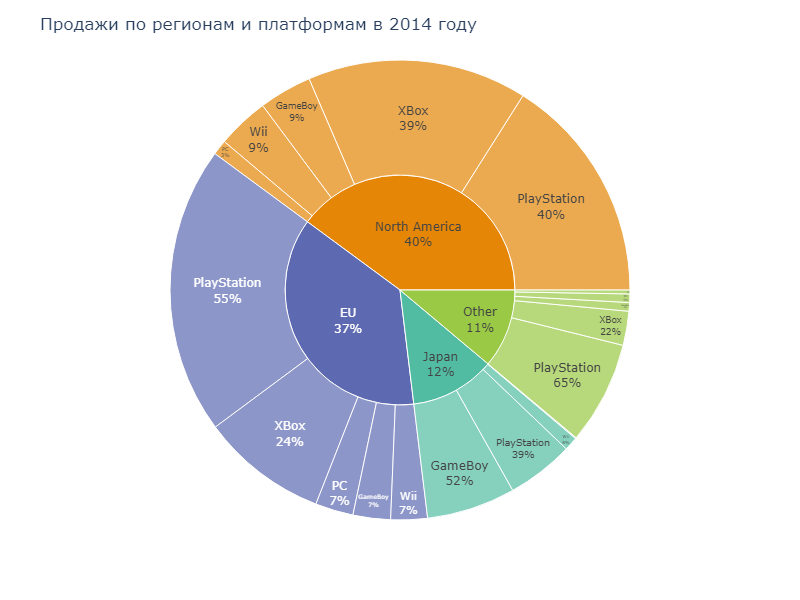

In [27]:
fig = px.sunburst(melted, path=['region', 'platform'], values='sales', color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_layout(title='Продажи по регионам и платформам в 2014 году',
                  width=800,
                  height=600)
fig.update_traces(textinfo='label+percent parent', insidetextorientation='horizontal')
fig.show("png")

К середине второго десятилетия 21-го века Старый и Новый свет в игровом рынке занимают 77%, более чем 3/4 от всего рынка.

Доминирующая платформа в обоих регионах - PS, причем в США доля PS и XBox в продажах практически равна (40 и 39 процентов), в то время как Европа больше предпочитает PlayStation, чем XBox (55 против 24 процентов). 

К великому сожалению так называемых "ПеКа-бояр", в США на долю ПК приходится всего 3% продаж *компьютерных* игр, в Европе же - чуть больше: 7%. Однако, в Старом Свете наравне с ПК предпочитают играть в GameBoy и Wii.

Примечателен рынок Японии (и не просто так он выделен отдельно). Специфика японского игрового рынка заключается в бытовом национализме простых японцев, а также и в высоком уровне развития рынка консолей и прочих игровых платформ в стране. При этом, GameBoy, как известно интересующимся людям, в стране распространен широко среди различных слоев населения.

В прочих странах ситуация похожа на ситуацию в Европе, где доминирует PlayStation, ей на пятки наступает XBox, а ПК и прочие платформы практически незаметны на фоне мастодонтов.

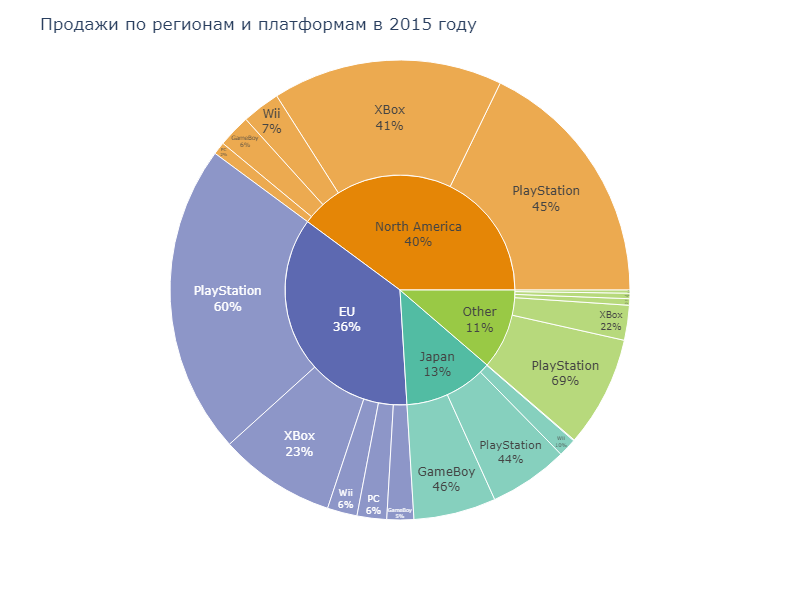

In [28]:
pivot_3yr_2015 = df_3yr.query('year_of_release == 2015').pivot_table(index=['platform_gen'], values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'], aggfunc='sum').reset_index()
pivot_3yr_2015.columns=['platform', 'EU', 'Japan', 'North America','Other','total']
melted = pivot_3yr_2015.melt(id_vars='platform', value_vars=['EU', 'Japan', 'North America', 'Other'], var_name='region', value_name='sales')
melted = melted.rename(columns={'platform': 'platform', 'region': 'region', 'sales': 'sales'})
fig = px.sunburst(melted, path=['region', 'platform'], values='sales', color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_layout(title='Продажи по регионам и платформам в 2015 году',
                  width=800,
                  height=600)
fig.update_traces(textinfo='label+percent parent', insidetextorientation='horizontal')
fig.show("png")

2015й год в истории игр ознаменовался выходом легендарного третьего "Ведьмака", а также множеством других примечательных игр, бывших как кроссплатформенными (Battlefield: Hardline, Need for Speed, FIFA2016), так и эксклюзивами (например, Bloodborne).

Распределение игр по платформам продолжает быть характерным для каждого региона. В США примерно поровну PS и XBox, в ЕС доминирует PS (практически 2/3 рынка), а в Японии по-прежнему любяи портативные консоли и PlayStation. 

В иных странах картина идентична ЕС и повторяться в ее оценке не стоит.

В общем же, 2015 год был более продуктивен на игры и незначительно изменил расстановку сил на рынке.

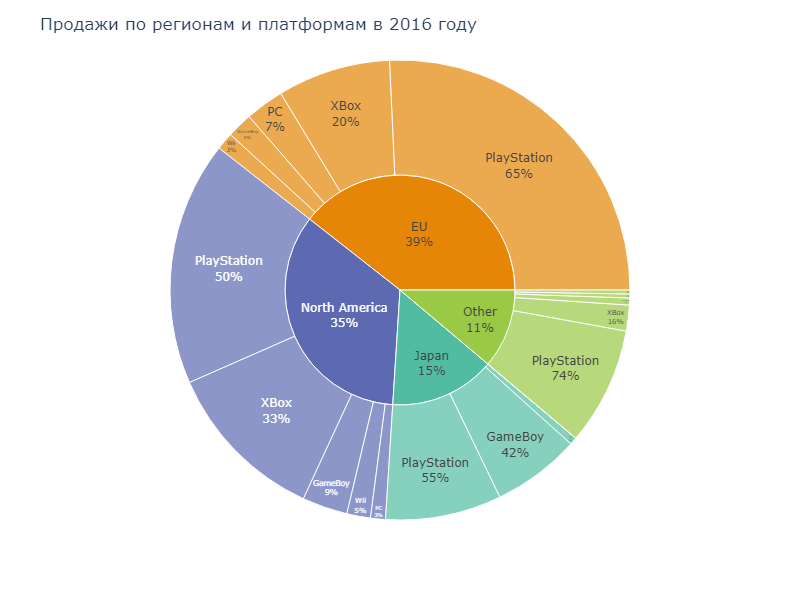

In [29]:
pivot_3yr_2016 = df_3yr.query('year_of_release == 2016').pivot_table(index=['platform_gen'], values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'], aggfunc='sum').reset_index()
pivot_3yr_2016.columns=['platform', 'EU', 'Japan', 'North America','Other','total']
melted = pivot_3yr_2016.melt(id_vars='platform', value_vars=['EU', 'Japan', 'North America', 'Other'], var_name='region', value_name='sales')
melted = melted.rename(columns={'platform': 'platform', 'region': 'region', 'sales': 'sales'})
fig = px.sunburst(melted, path=['region', 'platform'], values='sales', color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_layout(title='Продажи по регионам и платформам в 2016 году',
                  width=800,
                  height=600)
fig.update_traces(textinfo='label+percent parent', insidetextorientation='horizontal')
fig.show("png")

Картина за 2016й год практически полностью меняется. Однако, не следует делать на основе полученной диаграммы скоропалительные выводы: за 2016 год данные неполные, поэтому здесь лидер продаж - европейский рынок. Интересно обратить внимание, что на всех рынках доминирует PlayStation - это может быть связано с тем, что на момент получения среза данных еще не вышли ны рынок игры на американском рынке, либо не вышли игры PlayStation для других платформ (особенно это касается крупных тайтлов, а также, скорее всего, игр для GameBoy на японском рынке).

В целом же картина остается традиционной, и сохраняющейся и по сей день, когда вышли уже новые поколения PlayStation, XBox и Gameboy.

**Выводы**

На основании общего распределения игр по платформам и рынкам по состоянию на 2014-2016 годы, можно с уверенностью заявить, что PlayStation уверенно держит пальму первенства, следом за ней идет XBox, и далее существует только рынок ПК-игр (поскольку ПК-игроки либо не играют, либо не любят консольные игры) и узкий рынок Nintendo Wii, где преобладают несложные казуальные игры, и ориентированы они на физическую активность игрока и взаимодействие с пространственными манипуляторами с акселерометром, характерными для этой платформы.

Особняком стоит Япония, где нет места ПК-геймингу и практически не представлена консоль от Microsoft, что обуславливается именно особенностями данного национального рынка, а также тем, что, ввиду стесненности жилищных условий, японцы не могут себе позволить занимать место в доме большому телевизору и немаленькой консоли.

### Распределение продаж игр по жанрам

Дополнительно к распределению продаж игр по регионам в разрезе платформ будет интересно рассмотреть распределение продаж по жанрам и определить, какой жанр игр наиболее популярен в каждом из регионов.

Зная многообразие игр в современном мире, можно предположить, что для ЕС и США будут характерны шутеры и игры жанра экшн, в то время как в Японии более распространенными будут RPG (Final Fantasy, Zelda и прочие образчики отдельного поджанра jRPG).

In [30]:
pivot_3yr_2014 = df_3yr.query('year_of_release == 2014').pivot_table(index=['genre'], values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'], aggfunc='sum').reset_index()
pivot_3yr_2014.columns=['genre', 'EU', 'Japan', 'North America','Other','total']
pivot_3yr_2014

,genre,EU,Japan,North America,Other,total
0,Action,39.86,6.53,38.85,11.99,97.23
1,Adventure,1.82,1.38,1.80,0.57,5.57
2,Fighting,2.97,4.83,6.89,1.16,15.85
3,Misc,8.60,2.42,9.47,2.89,23.38
4,Platform,3.60,1.27,3.01,0.93,8.81
5,Puzzle,0.39,0.41,0.59,0.10,1.49
6,Racing,7.61,1.47,5.92,1.66,16.66
7,Role-Playing,10.96,17.75,13.65,3.26,45.62
8,Shooter,25.24,1.08,30.84,8.05,65.21
9,Simulation,3.56,0.38,1.27,0.37,5.58


In [31]:
melted = pivot_3yr_2014.melt(id_vars='genre', value_vars=['EU', 'Japan', 'North America', 'Other'], var_name='region', value_name='sales')
melted = melted.rename(columns={'genre': 'genre', 'region': 'region', 'sales': 'sales'})
melted

,genre,region,sales
0,Action,EU,39.86
1,Adventure,EU,1.82
2,Fighting,EU,2.97
3,Misc,EU,8.60
4,Platform,EU,3.60
5,Puzzle,EU,0.39
6,Racing,EU,7.61
7,Role-Playing,EU,10.96
8,Shooter,EU,25.24
9,Simulation,EU,3.56


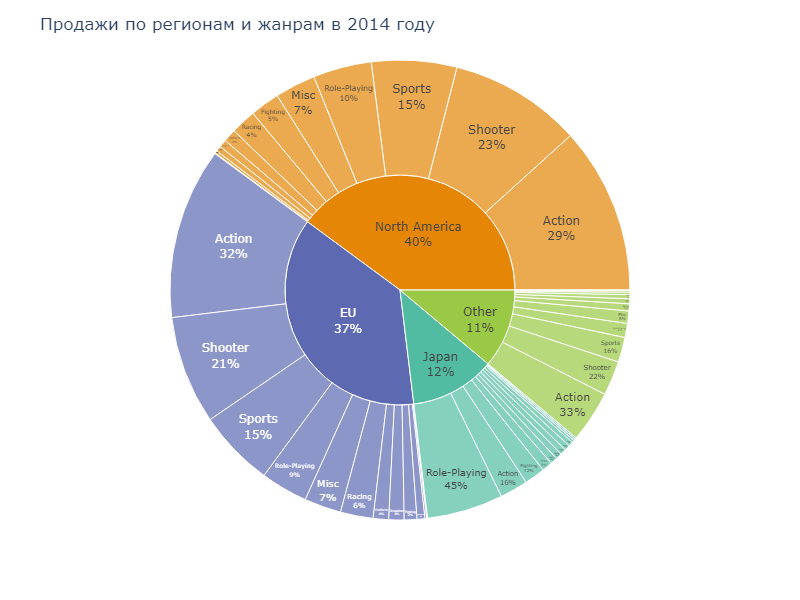

In [32]:
fig = px.sunburst(melted, path=['region', 'genre'], values='sales', color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_layout(title='Продажи по регионам и жанрам в 2014 году',
                  width=800,
                  height=600)
fig.update_traces(textinfo='label+percent parent', insidetextorientation='horizontal')
fig.show("png")

Как и предполагалось в начале раздела, в США и ЕС самые популярные игры в жанре экшн и шутер, также по 15% приходится на спортивные игры, RPG и прочие жанры представлены минимально.

В Японии же, как и ожидалось, доминируют RPG, следом идут экшн и файтинги. И это в целом тоже является характерным для японского рынка случаем.

Остальные страны в свою очередь похожи на Старый Свет в распределении продаж игр.

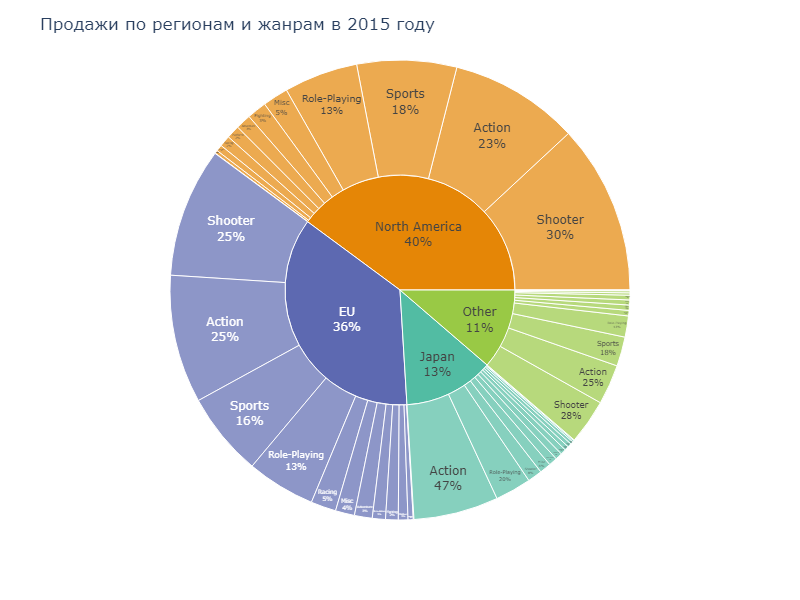

In [33]:
pivot_3yr_2015 = df_3yr.query('year_of_release == 2015').pivot_table(index=['genre'], values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'], aggfunc='sum').reset_index()
pivot_3yr_2015.columns=['genre', 'EU', 'Japan', 'North America','Other','total']
melted = pivot_3yr_2015.melt(id_vars='genre', value_vars=['EU', 'Japan', 'North America', 'Other'], var_name='region', value_name='sales')
melted = melted.rename(columns={'genre': 'genre', 'region': 'region', 'sales': 'sales'})
fig = px.sunburst(melted, path=['region', 'genre'], values='sales', color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_layout(title='Продажи по регионам и жанрам в 2015 году',
                  width=800,
                  height=600)
fig.update_traces(textinfo='label+percent parent', insidetextorientation='horizontal')
fig.show("png")

2015 год показывает слегка изменившуюся картину. В США и ЕС по-прежнему популярны шутеры, и их доля в общей сумме продаж выше, чем в 2014 году. Основной вклад сюда, как известно исторически, вложила раскручивающаяся серия Call of Duty, также высокие продажи показывал Battlefield 4 (и эта игра до сих пор, в 2023 году, популярна на многих платформах), и многие другие тайтлы поменьше. Экшн в этих же регионах следует на втором месте с примерно одинаковой долей (23 и 25 процентов), следом идут спортивные игры и RPG.

В Японии в этот же период лидирующие позиции занимает жанр экшн. На втором месте - RPG, далее идут шутеры, "прочие" и симуляторы. Стоит заметить, как и в 2014 году, японский рынок совершенно другой, и японский геймер имеет совершенно другие предочтения. Здесь сказывается и различие культур, и, скорее всего, тяга японских игроков к более интеллектуальным играм, чем банальные шутеры.

Прочие страны, в очередной раз, по продажам очень похожи на США и Европу, находясь в целом где-то между этих двух регионов.

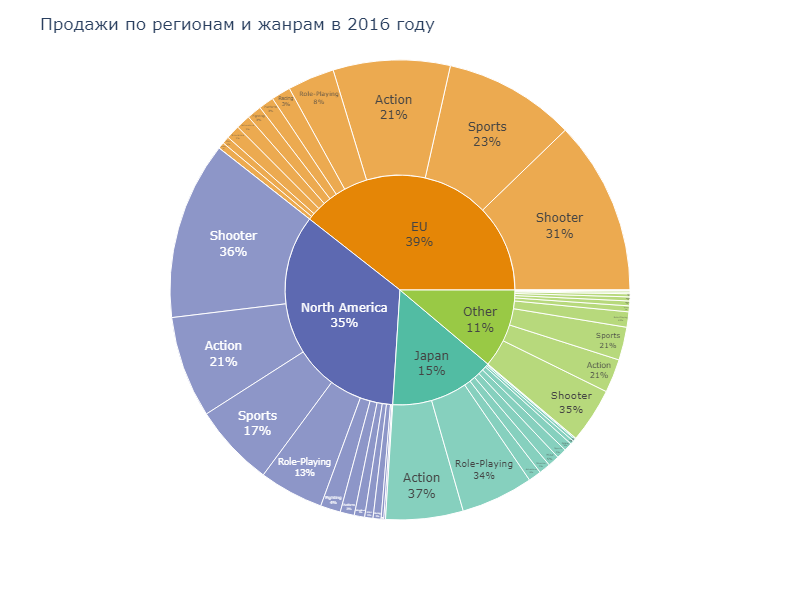

In [34]:
pivot_3yr_2016 = df_3yr.query('year_of_release == 2016').pivot_table(index=['genre'], values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'], aggfunc='sum').reset_index()
pivot_3yr_2016.columns=['genre', 'EU', 'Japan', 'North America','Other','total']
melted = pivot_3yr_2016.melt(id_vars='genre', value_vars=['EU', 'Japan', 'North America', 'Other'], var_name='region', value_name='sales')
melted = melted.rename(columns={'genre': 'genre', 'region': 'region', 'sales': 'sales'})
fig = px.sunburst(melted, path=['region', 'genre'], values='sales', color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_layout(title='Продажи по регионам и жанрам в 2016 году',
                  width=800,
                  height=600)
fig.update_traces(textinfo='label+percent parent', insidetextorientation='horizontal')
fig.show("png")

По имеющимся данным 2016 года можно вновь констатировать факт того, что Европа, США и прочие страны тяготеют больше к жанрам шутера и экшна, и при этом проявляют интерес к спортивным играм. В немалой степени это объясняется постоянным развитием игровой отрасли и тем, что спортивные игры, выходя год за годом, совершенствуются и позволяют игрокам получить опыт игры, сравнимый с практически реальным спортивным матчем. Вдобавок к этому, в 2016 году проходил очередной Чемпионат Европы по футболу, очередные летние Олимпийские игры, а также чемпионат и кубок мира по хоккею с шайбой. В преддверии этих значимых спортивных событий вполне логично, что спортивные игры будут иметь популярность.

Японский рынок же, как и ранее, показывает совершенно другую картину. Популярны экшн и RPG, далее идут приключения и шутеры. Японский геймер снова показывает себя совершенно иным, нежели чем остальной мир, и тяготеет к спокойным и вдумчивым играм.

**Выводы**

Изучая данные за 2014-2016 годы в разрезе распределения продаж по регионам мира в зависимости от жанра, можно обратить внимание, что шутеры за 3 года значительно увеличили продажи. Это связано с тем, что многие подобные игры на сегодняшний день предполагают не только одиночную игру, но и мультиплеер, и именно опыт игры против живого противника привлекает геймера. Также и заметен небольшой рост продаж спортивных игр: с оптимизацией сетевого взаимодействия привлекается все больше игроков, желающих играть именно против живого противника, а не против ИИ.

Япония в предпочтениях местных игроков стоит особняком и показывает, что японский геймер по-прежнему предпочитает RPG и экшн всем остальным жанрам. Популярные на Западе шутеры здесь имеют достаточно низкую долю продаж. При этом, если посмотреть на продажи в разрезе платформ, становится понятно, почему так происходит: во-первых, на GameBoy редко можно встретить шутер, а во-вторых, на консоли играть в шутеры достаточно сложно, даже если приноровиться.

### Общее распределение продаж по регионам, платформам и жанрам за 2014-2016 годы

Для понимания общей картины, можно построить общую диаграмму с долями продаж игр по регионам в разрезе платформ и жанров по каждой платформе. Это даст небольшое понимание специфики каждого рынка и, возможно, подтвердит ранее высказывавшиеся мысли.

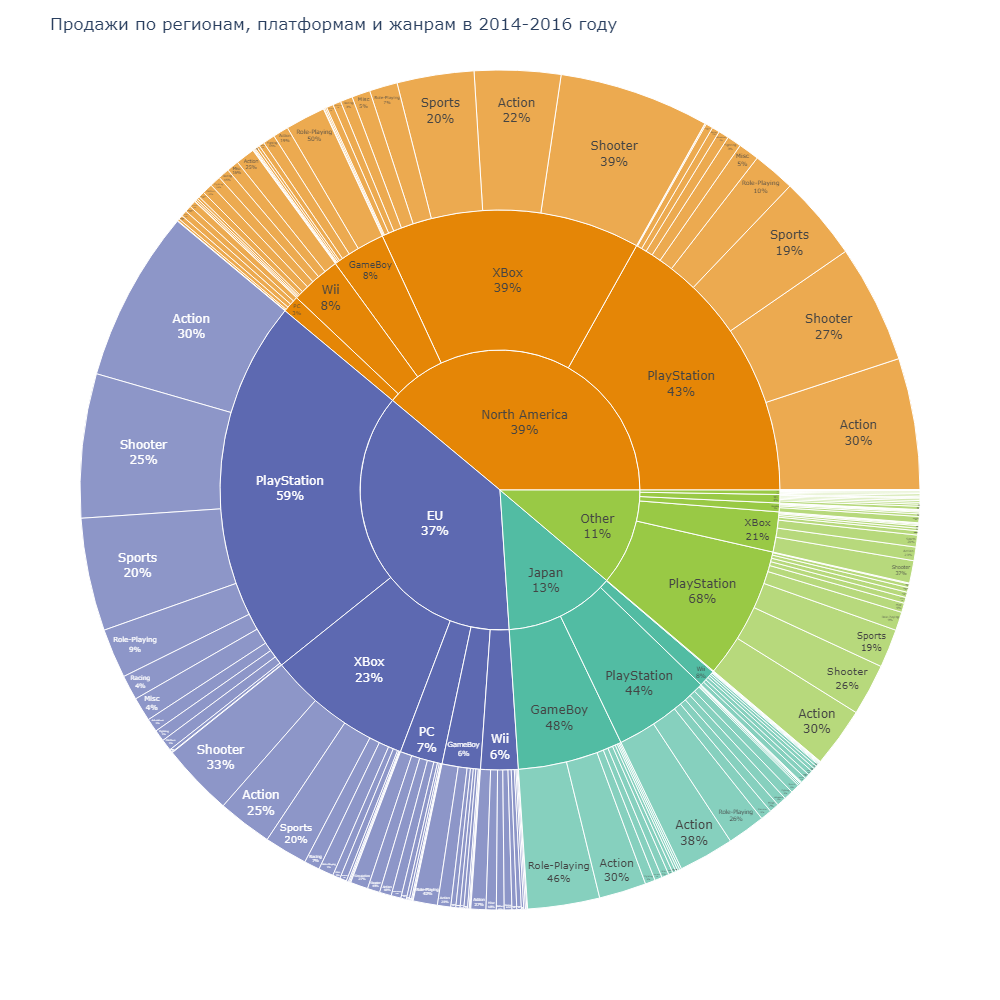

In [35]:
pivot_3yr_tot = df_3yr.pivot_table(index=['platform_gen','genre'], values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'], aggfunc='sum').reset_index()
pivot_3yr_tot.columns=['platform','genre', 'EU', 'Japan', 'North America','Other','total']
melted = pivot_3yr_tot.melt(id_vars=['platform','genre'], value_vars=['EU', 'Japan', 'North America', 'Other'], var_name='region', value_name='sales')
melted = melted.rename(columns={'platform':'platform', 'genre': 'genre', 'region': 'region', 'sales': 'sales'})
fig = px.sunburst(melted, path=['region','platform', 'genre'], values='sales', color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_layout(title='Продажи по регионам, платформам и жанрам в 2014-2016 году',
                  width=1000,
                  height=1000)
fig.update_traces(textinfo='label+percent parent', insidetextorientation='horizontal')
fig.show("png")

Также дополнительно построим диаграмму размаха для продаж по всем платформам (а не по укрупненному признаку) за период с 2014 по 2016 годы.

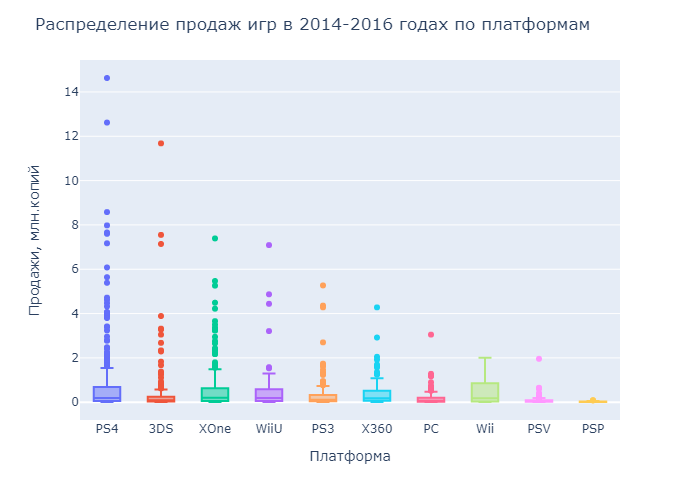

In [36]:
fig = px.box(df_3yr, x="platform", y="total_sales", color='platform')
fig.update_layout(title="Распределение продаж игр в 2014-2016 годах по платформам",
                  yaxis_title="Продажи, млн.копий",
                 xaxis_title="Платформа",
                 showlegend=False)
fig.show("png")

Общая диаграмма действительно показывает то, что, например, для платформы GameBoy наиболее характерны игры жанра RPG и экшн, при этом вне зависимости от региона продажи. Изначально эта платформа позиционирует себя как портативная консоль, и игры на ней соответствуют позиции. Плюс ко всему, сказывается высокая распространенность платформы в Японии, что тянет за собой ориентацию разработчиков игр для платформы на главную целевую аудиторию.

Такая же ситуация с двумя конкурирующими платформами PS и XBox. Для PS более популярны экшн-игры, и только на втором месте идут шутеры, для XBox ситуация зеркальна: на первом месте идут шутеры, а затем экшны. В немалой степени это обусловлено позиционированием консоли на рынке. XBox построена с возможность использовать стандартную комбинацию клавиатура+мышь, и сопряжение с этими устройствами более отлажено. В свою очередь, для PS, насколько известно, до сих пор нет нормально отлаженного модуля поддержки клавиатуры и мыши. Плюс ко всему, XBox еще на заре своего появления презентовала шутер Halo как один из немногих шутеров для консоли (и он был долгое время эксклюзивом консоли), что уже говорит о том, что платформа более "Shooter-friendly", если это можно так назвать.

PS же, в силу своего японского происхождения, больше ориентирована на экшны, RPG и различные их вариации, где не так важна точность наведения прицела, а больший упор сделан на сочетание различных комбо-действий. По этой же причине, многими геймерами джойстик Xbox считается не настолько удобным для экшн и RPG игр, насколько джойстик от PS.

Интересно заметить, что в каждом регионе Wii имеет 4-8% своей аудитории. Приставка по праву всеми считается достаточно нишевой и специфической для пользователя, поэтому свою аудиторию имеет как ежегодно, так и в общем расчете.

Не менее интересно то, что в Японии ПК не представлен как игровая платформа вообще. Страна не приемлет ПК-гейминга. В остальном же мире продажи игр на ПК составляют от 2 до 7 процентов. Частично это можно объяснить тем, что существуют пиратские игры, и они ни в какие статистики не попадают, но при этом не стоит забывать и о чрезвычайной дороговизне комплектующих компьютерного "железа", что не позволяет каждый год приобретать новые игры. Плюсом идет также низкая способность ноутбуков (обычных и "игровых") показывать приемлемую производительность. Но самая главная суть такой разницы, скорее всего, кроется в том, что простому игроку банально комфортнее играть на большом телевизоре, сидя на диване, а не за компьютером.

При этом всем, диаграмма размаха показывает, что в периоде с 2014 по 2016 год, на рынок все еще выходят игры, поддерживающие предыдущее поколение приставки (PS3 и XBox 360), но их количество значительно меньше, чем для актуального поколения. Одновременно с этим и количество продаж этих игр меньше, чем у актуального поколения. Медианное количество продаж игр для PS4 составляет 0,19 млн. копий, для Xbox One - 0,205. Учитывая, что по количеству проданных копий PlayStation находится в лидерах, это может в очередной раз подчеркивать наличие так называемых "Сони-эксклюзивов", продающихся только на этой платформе и дающих высокое количество суммарно проданных копий игр.

При этом можно обратить внимание, что для двух актуальных платформ (PS4, DS) есть игры, которые продались более чем 10 миллионами копий. XBox One и Wii следуют за ними, и у них максимальные продажи за весь период составили около 7 млн. копий одной игры. Остальные платформы продавались значительно меньше, в особенности PSP, которая находится в аутсайдерах с менее 100 тыс. проданных копий.

### Зависимость продаж платформы от оценки критиков и пользователей

На продажи игр в условиях современного рынка могут значительно влиять рейтинги пользователей и отзывы критиков. Они могут помочь потенциальным покупателям сделать выбор, приобретать игру и играть в нее, либо не приобретать. Если в прошлом рейтинги игр были не всегда определяющим фактором, то сейчас провалы или взлеты в рейтингах могут определять покупательское поведение игроков.

При этом, не следует сбрасывать со счетов то, что рейтингами могут манипулировать. Известно множество случаев, в основном с ААА-проектами, когда ввиду недоработанности, либо каких-либо нестандартных ходов разработчиков (лутбоксы в Battlefront, pay-to-grind в последних "Ассасинах" и прочее) рейтинги в целом неплохих игр падали.

Также известна практика накрутки положительных отзывов от критиков, когда намеренно критики рекламируют игру (часто за вознаграждение), которая может вполне оказаться проходной и совершенно неиграбельной (Kingdom Come: Deliverance тому примером).

Рассмотрим корреляцию уровня продаж игр на самой популярной платформе PlayStation с оценками критиков и затем с оценками пользователей.

In [37]:
df_3yr_ps = df_3yr.query('platform_gen == "PlayStation"')

Построим диаграмму рассеяния для общемировых продаж и пользовательских оценок

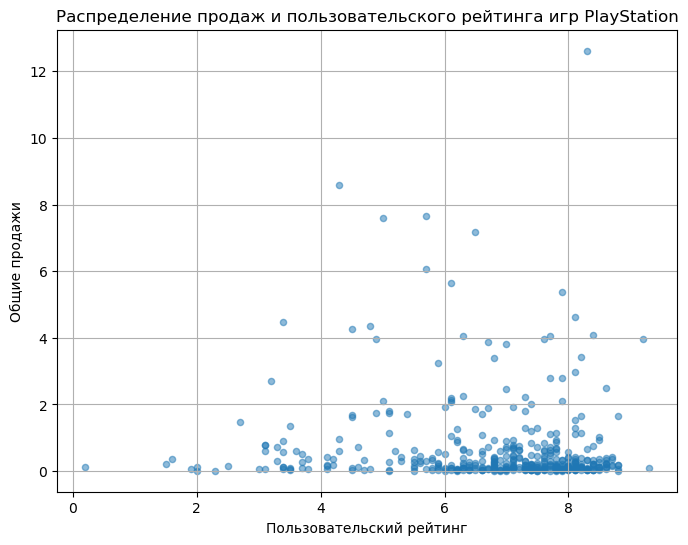

In [38]:
df_3yr_ps.plot(y='total_sales', x='user_score', kind='scatter', figsize=(8,6), grid=True, sharex=False, alpha=0.5)
plt.ylabel('Общие продажи')
plt.xlabel('Пользовательский рейтинг')
plt.title('Распределение продаж и пользовательского рейтинга игр PlayStation')
plt.show()

И аналогичную диаграмму для оценок критиков

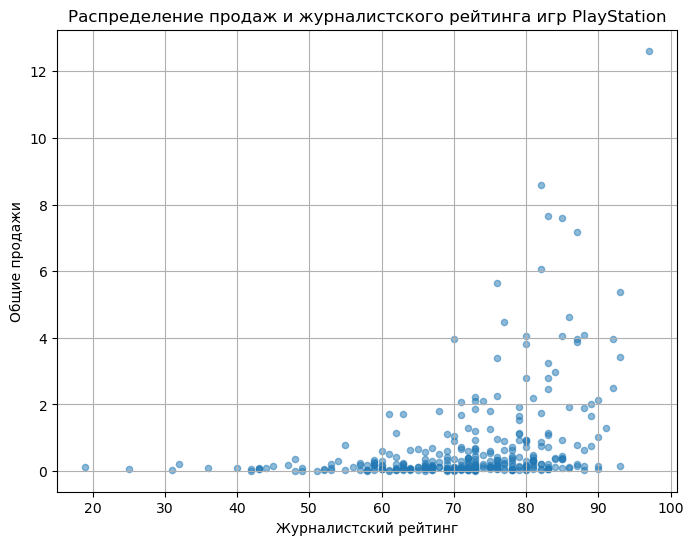

In [39]:
df_3yr_ps.plot(y='total_sales', x='critic_score', kind='scatter', figsize=(8,6), grid=True, sharex=False, alpha=0.5)
plt.ylabel('Общие продажи')
plt.xlabel('Журналистский рейтинг')
plt.title('Распределение продаж и журналистского рейтинга игр PlayStation')
plt.show()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.101520,-0.079148,-0.090128,-0.098767,0.037071,0.015948,-0.098050
na_sales,-0.101520,1.000000,0.795889,0.264370,0.947193,0.375103,-0.070295,0.930089
eu_sales,-0.079148,0.795889,1.000000,0.263011,0.947279,0.311948,-0.088789,0.959372
jp_sales,-0.090128,0.264370,0.263011,1.000000,0.285859,0.332650,0.222804,0.337524
other_sales,-0.098767,0.947193,0.947279,0.285859,1.000000,0.369585,-0.083743,0.997210
critic_score,0.037071,0.375103,0.311948,0.332650,0.369585,1.000000,0.555550,0.370521
user_score,0.015948,-0.070295,-0.088789,0.222804,-0.083743,0.555550,1.000000,-0.073207
total_sales,-0.098050,0.930089,0.959372,0.337524,0.997210,0.370521,-0.073207,1.000000


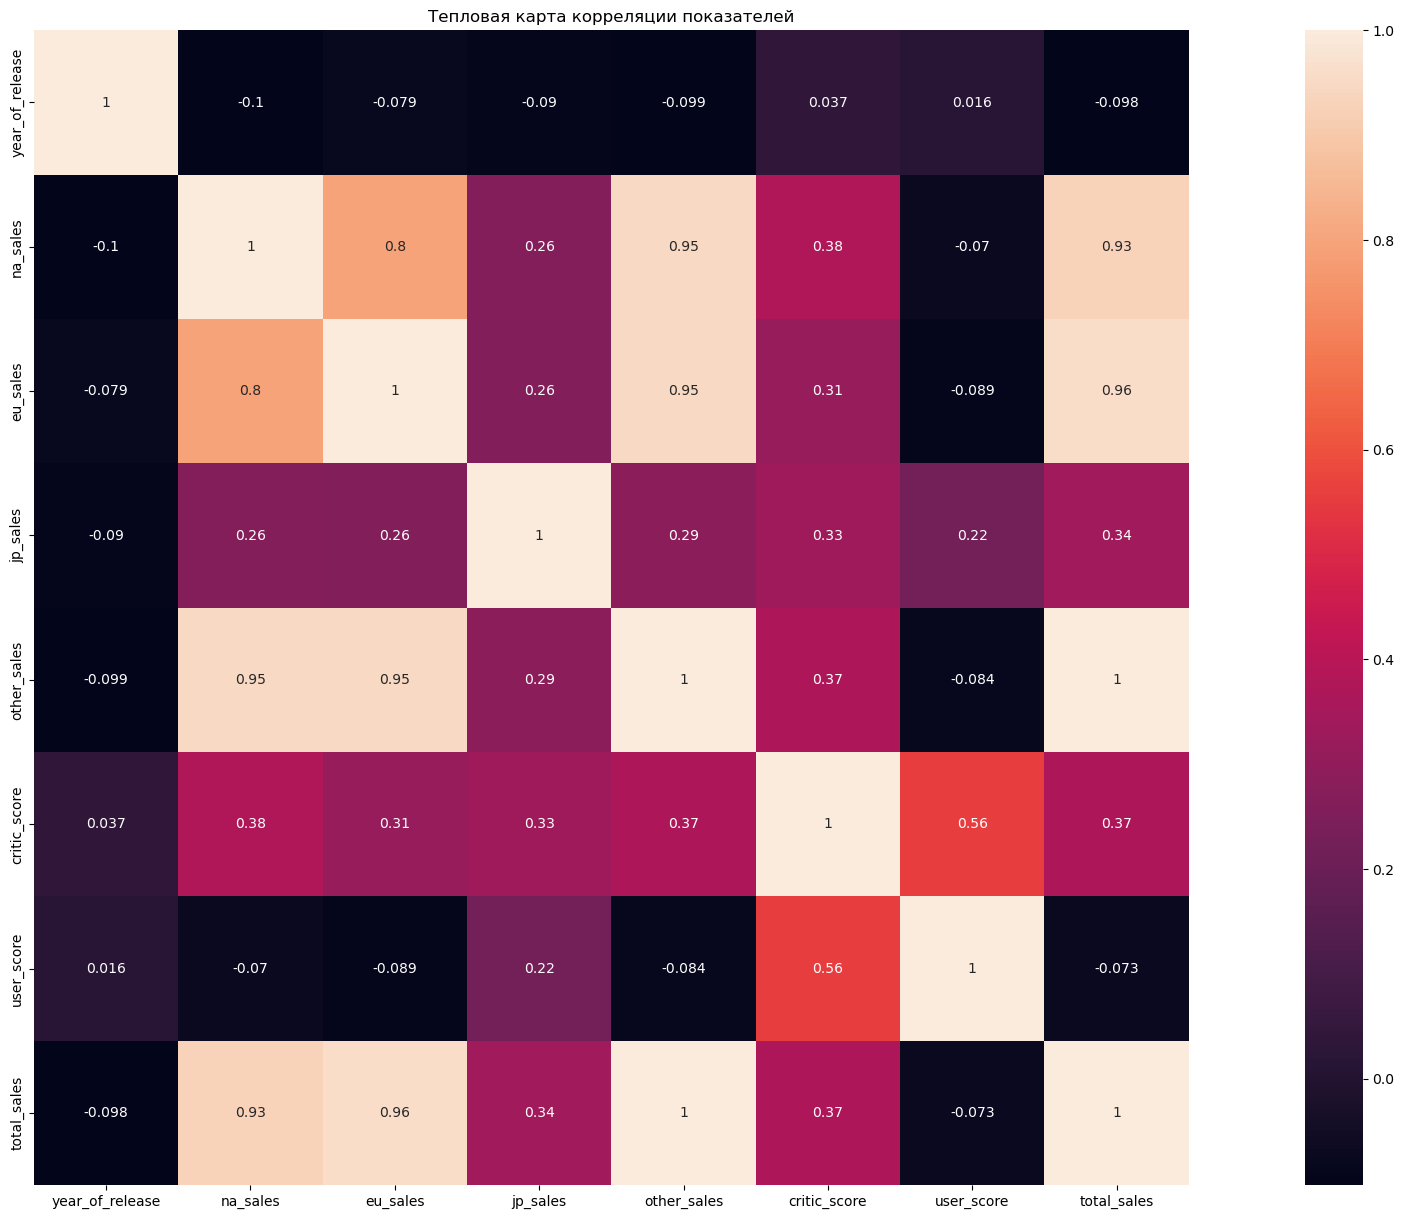

In [40]:
cm = df_3yr_ps.corr() #вычисляем матрицу корреляций
display(cm)
plt.figure(figsize=(30,15))
#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm,annot=True, square=True)
plt.title('Тепловая карта корреляции показателей')
plt.show()

По корреляционной матрице и на тепловой карте мы видим, что продажи во всех регионах положительно коррелированы с оценками критиков. Это, в свою очередь, подтверждает ранее высказанную мысль о том, что положительные отзывы критиков могут быть использованы как инструмент увеличения продаж, если эти отзывы становятся проплаченными. Также интересно, что с коэффициентом более 0,55 коррелированы отзывы критиков и пользователей.

Но при этом, отзывы пользователей положительно коррелированы с продажами игр только в Японии (коффициент 0,22), а в остальных регионах - отрицательно с коэффициентом чуть меньше -0,1, а это означает, что в остальных регионах игроки при покупке игр не учитывают мнение других пользователей.

Достаточно интересно наблюдать такое влияние оценок для игр PlayStation на их "домашнем" рынке и во всем мире.

Далее рассмотрим аналогичные корреляции для XBox, GameBoy, Wii и PC.

In [41]:
df_3yr_x = df_3yr.query('platform_gen == "XBox"')

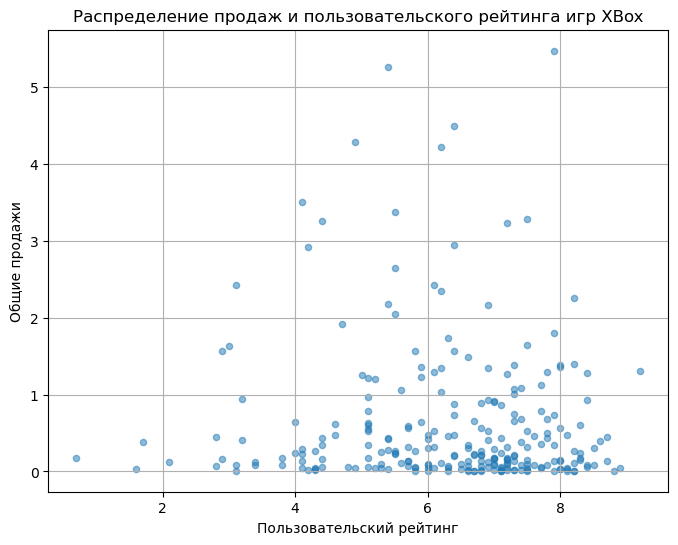

In [42]:
df_3yr_x.plot(y='total_sales', x='user_score', kind='scatter', figsize=(8,6), grid=True, sharex=False, alpha=0.5)
plt.ylabel('Общие продажи')
plt.xlabel('Пользовательский рейтинг')
plt.title('Распределение продаж и пользовательского рейтинга игр XBox')
plt.show()

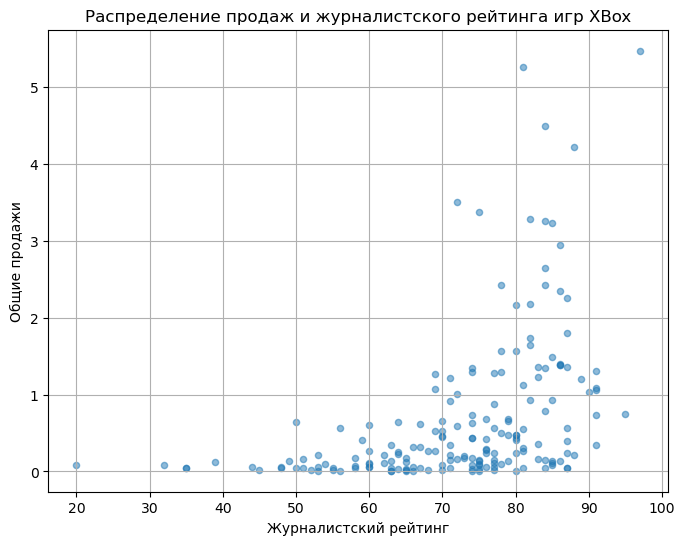

In [43]:
df_3yr_x.plot(y='total_sales', x='critic_score', kind='scatter', figsize=(8,6), grid=True, sharex=False, alpha=0.5)
plt.ylabel('Общие продажи')
plt.xlabel('Журналистский рейтинг')
plt.title('Распределение продаж и журналистского рейтинга игр XBox')
plt.show()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.182688,-0.160037,-0.142346,-0.188487,0.115201,0.005226,-0.186750
na_sales,-0.182688,1.000000,0.736394,0.397659,0.986413,0.409566,-0.056861,0.966029
eu_sales,-0.160037,0.736394,1.000000,0.378653,0.834874,0.382607,-0.044855,0.886181
jp_sales,-0.142346,0.397659,0.378653,1.000000,0.412411,0.229221,0.080945,0.421026
other_sales,-0.188487,0.986413,0.834874,0.412411,1.000000,0.431427,-0.057652,0.994449
critic_score,0.115201,0.409566,0.382607,0.229221,0.431427,1.000000,0.488377,0.432603
user_score,0.005226,-0.056861,-0.044855,0.080945,-0.057652,0.488377,1.000000,-0.056482
total_sales,-0.186750,0.966029,0.886181,0.421026,0.994449,0.432603,-0.056482,1.000000


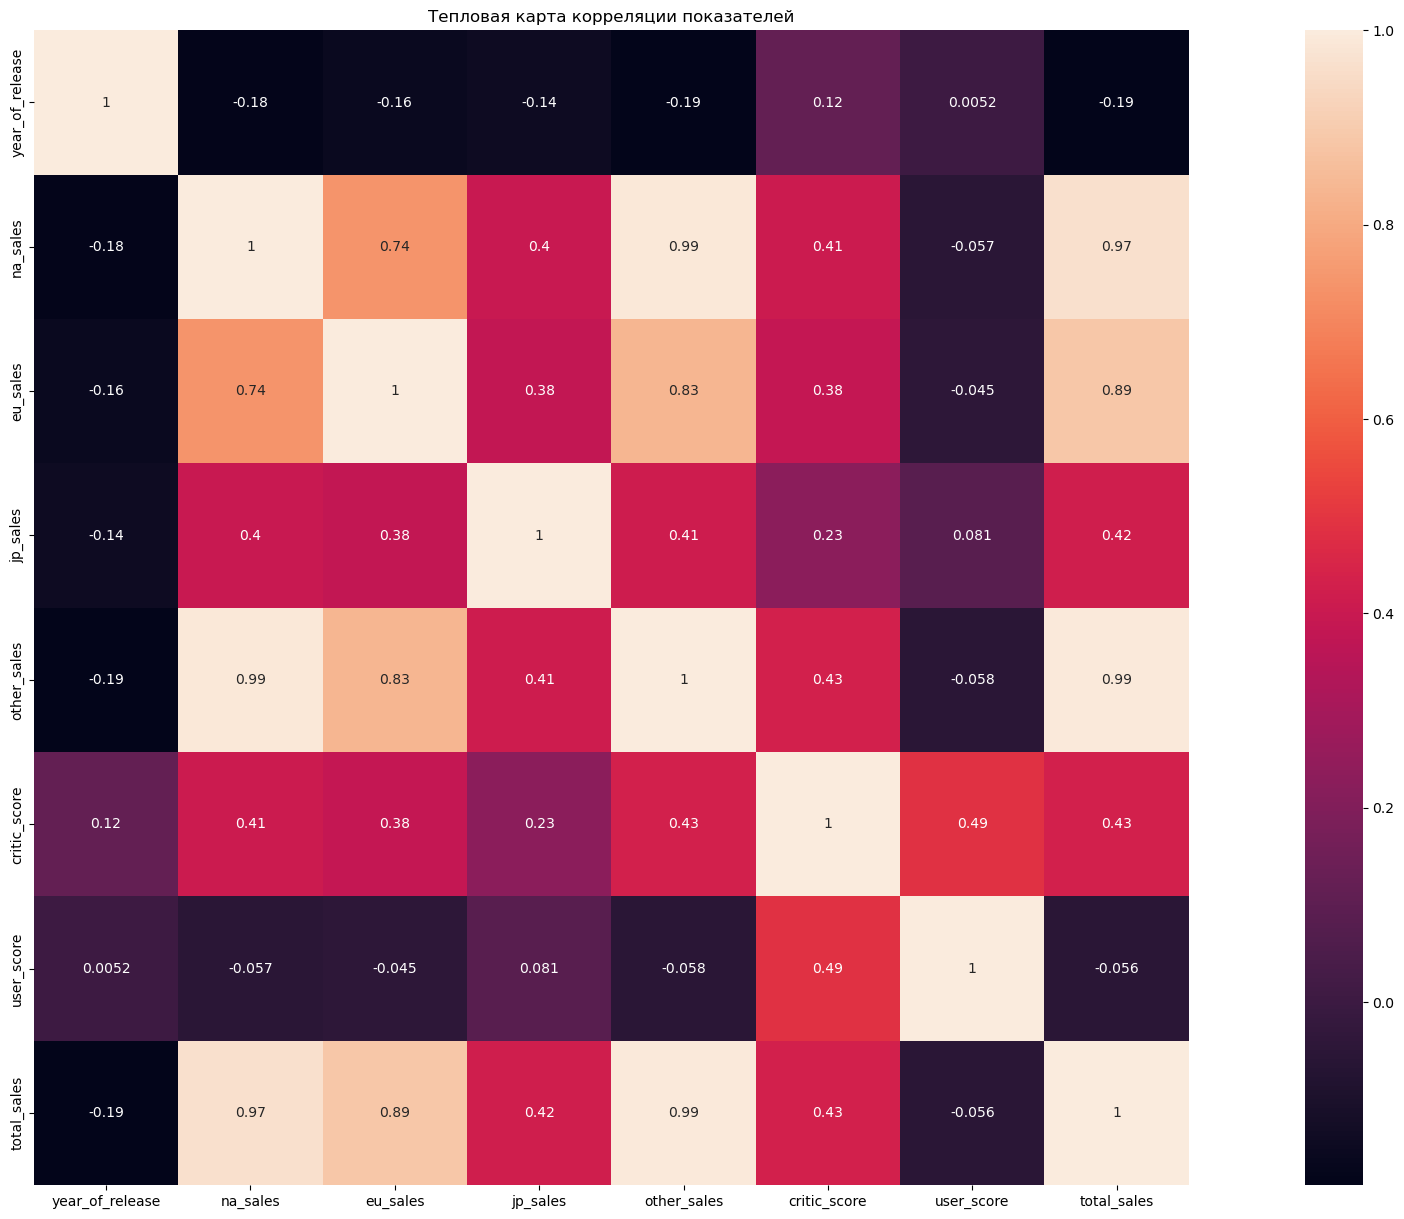

In [44]:
cm = df_3yr_x.corr() #вычисляем матрицу корреляций
display(cm)
plt.figure(figsize=(30,15))
#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm,annot=True, square=True)
plt.title('Тепловая карта корреляции показателей')
plt.show()

У платформы Microsoft ситуация похожа на PlayStation - высокая корреляция продаж с отзывами критиков по всему миру, кроме Японии (здесь стоит вспомнить о том, что платформа вообще слабо представлена в Японии). 

В части пользовательских оценок ситуация аналогична: минимальная отрицательная корреляция (иными словами, пользовательские отзывы на игры не оказывают влияние на продажи), и в Японии - минимальная положительная.

In [45]:
df_3yr_gb = df_3yr.query('platform_gen == "GameBoy"')

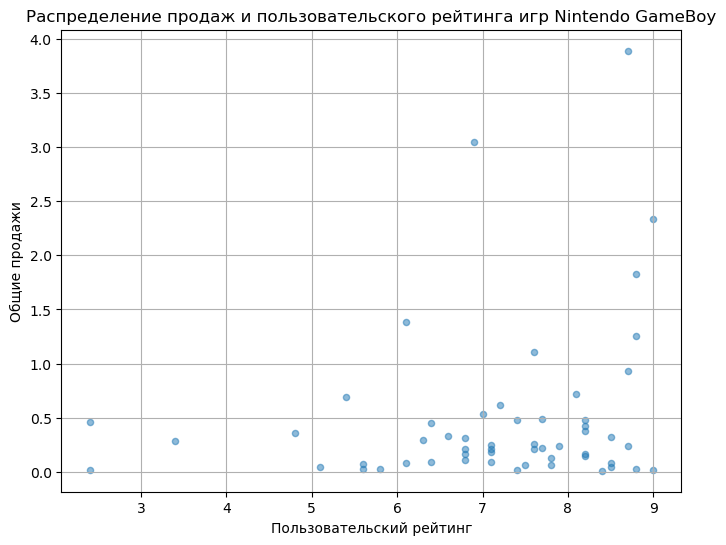

In [46]:
df_3yr_gb.plot(y='total_sales', x='user_score', kind='scatter', figsize=(8,6), grid=True, sharex=False, alpha=0.5)
plt.ylabel('Общие продажи')
plt.xlabel('Пользовательский рейтинг')
plt.title('Распределение продаж и пользовательского рейтинга игр Nintendo GameBoy')
plt.show()

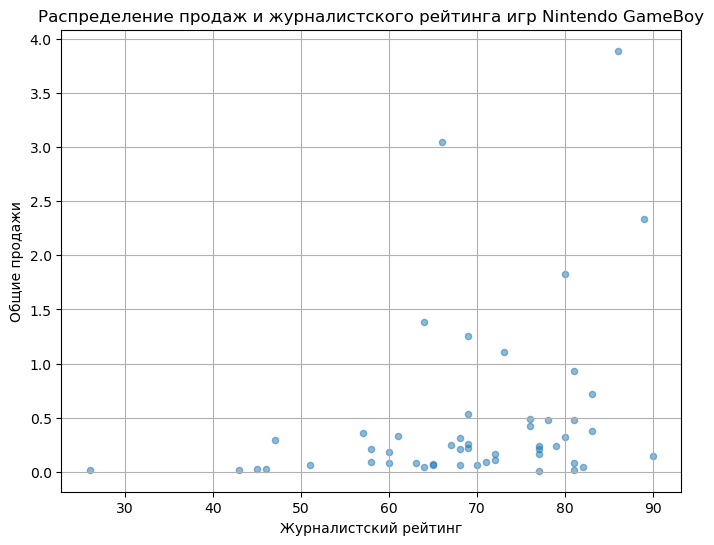

In [47]:
df_3yr_gb.plot(y='total_sales', x='critic_score', kind='scatter', figsize=(8,6), grid=True, sharex=False, alpha=0.5)
plt.ylabel('Общие продажи')
plt.xlabel('Журналистский рейтинг')
plt.title('Распределение продаж и журналистского рейтинга игр Nintendo GameBoy')
plt.show()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.064862,-0.080950,-0.065903,-0.069488,0.201100,0.235841,-0.077659
na_sales,-0.064862,1.000000,0.926126,0.598757,0.995141,0.363441,0.254592,0.926824
eu_sales,-0.080950,0.926126,1.000000,0.570443,0.957303,0.178086,0.014621,0.902940
jp_sales,-0.065903,0.598757,0.570443,1.000000,0.600666,0.279149,0.235903,0.844990
other_sales,-0.069488,0.995141,0.957303,0.600666,1.000000,0.330872,0.203967,0.933912
critic_score,0.201100,0.363441,0.178086,0.279149,0.330872,1.000000,0.862485,0.314117
user_score,0.235841,0.254592,0.014621,0.235903,0.203967,0.862485,1.000000,0.215193
total_sales,-0.077659,0.926824,0.902940,0.844990,0.933912,0.314117,0.215193,1.000000


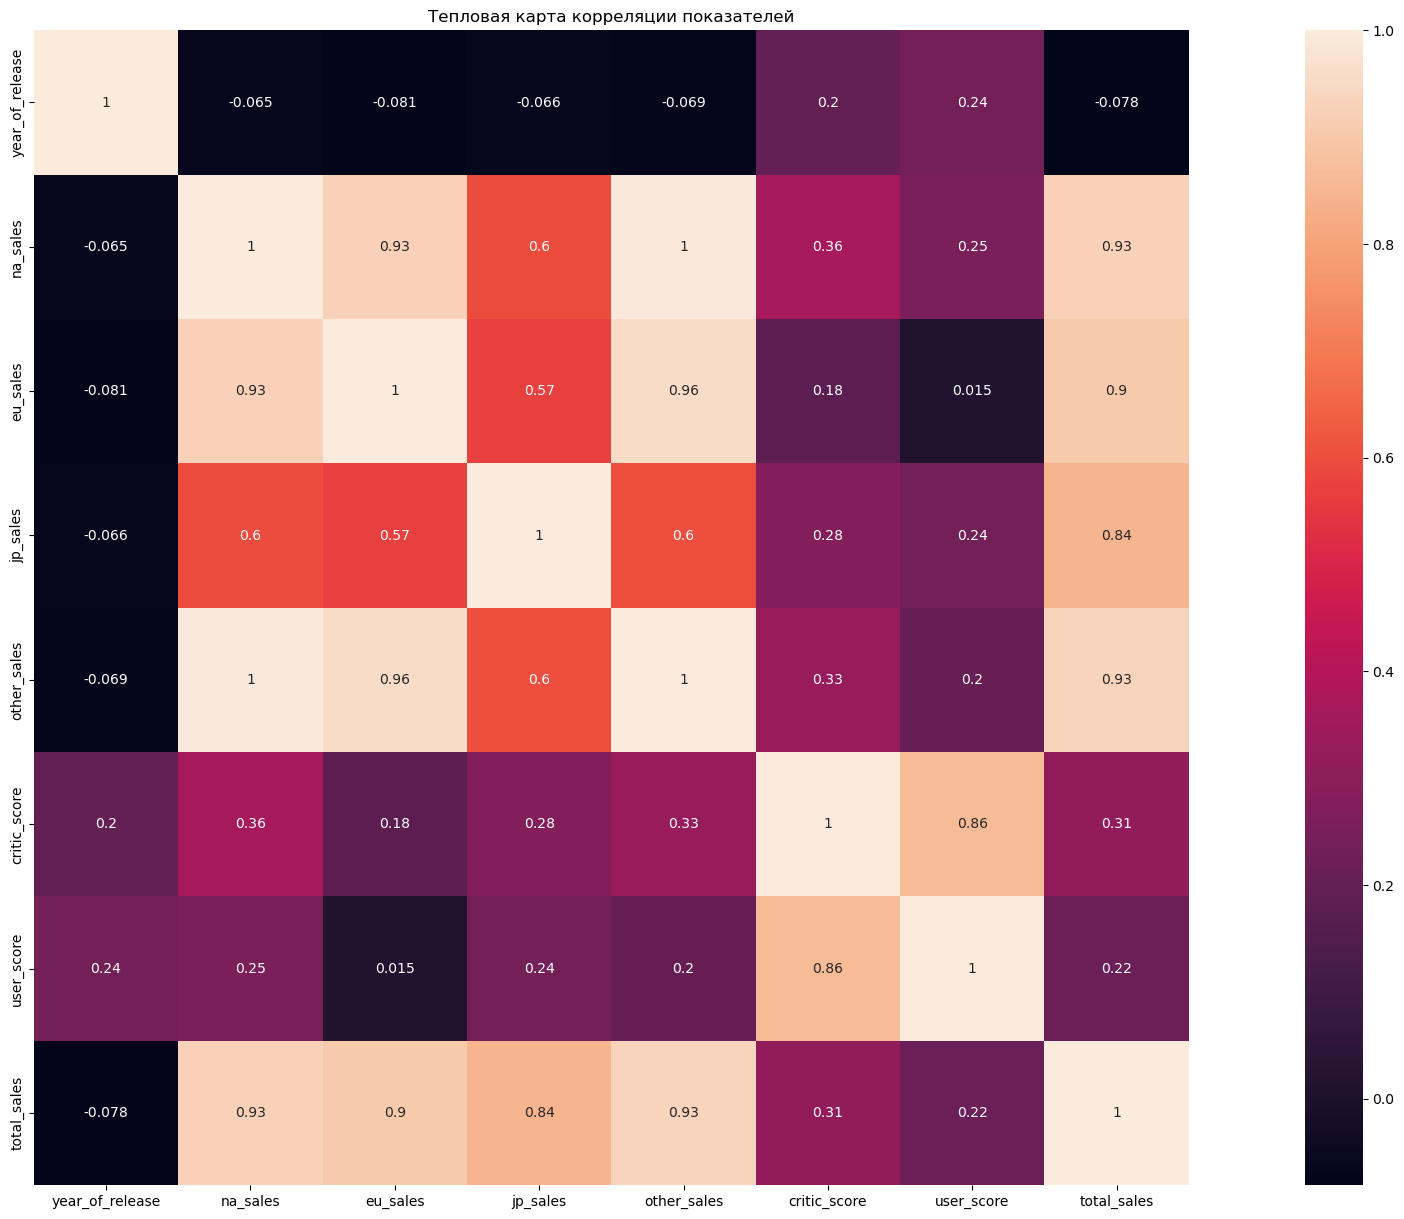

In [48]:
cm = df_3yr_gb.corr() #вычисляем матрицу корреляций
display(cm)
plt.figure(figsize=(30,15))
#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm,annot=True, square=True)
plt.title('Тепловая карта корреляции показателей')
plt.show()

Ситуация с продажами GameBoy и их зависимостью от оценок пользователей и критиков разительно отличается от двух крупных платформ, PS и XBox. Здесь продажи во всех регионах слабо положительно коррелируют с оценками как критиков, так и пользователей. Причем в Европе и Японии коэффициенты практически равны. В Штатах и всем остальном мире оценка критиков больше влияет на продажи игр для мобильной платформы Nintendo.

Также интересно заметить, что весьма высоко положительно коррелируют оценки критиков и пользователей между собой с коэффициентом 0,86. Возможно, это связано с тем, что рынок игр для GB весьма специфичен, либо с выпускающей политикой Nintendo, не дающей выйти плохим играм для платформы.

In [49]:
df_3yr_wii = df_3yr.query('platform_gen == "Wii"')

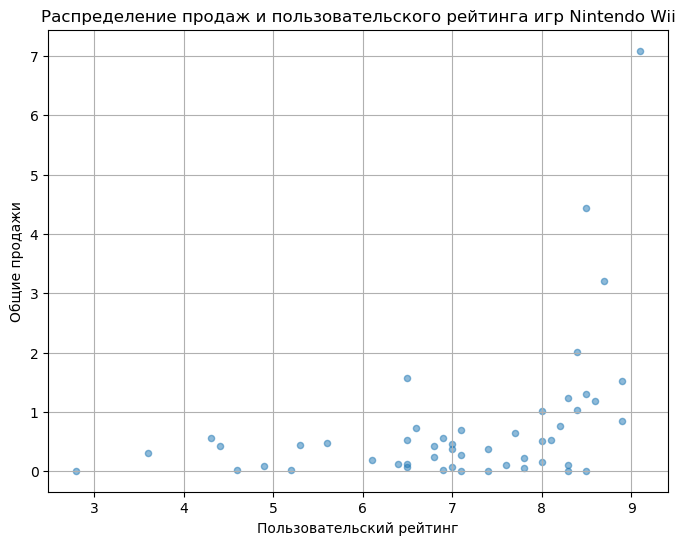

In [50]:
df_3yr_wii.plot(y='total_sales', x='user_score', kind='scatter', figsize=(8,6), grid=True, sharex=False, alpha=0.5)
plt.ylabel('Общие продажи')
plt.xlabel('Пользовательский рейтинг')
plt.title('Распределение продаж и пользовательского рейтинга игр Nintendo Wii')
plt.show()

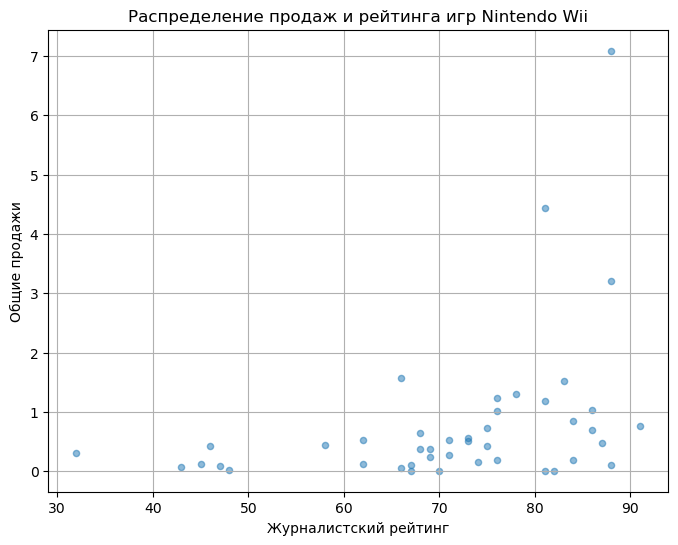

In [51]:
df_3yr_wii.plot(y='total_sales', x='critic_score', kind='scatter', figsize=(8,6), grid=True, sharex=False, alpha=0.5)
plt.ylabel('Общие продажи')
plt.xlabel('Журналистский рейтинг')
plt.title('Распределение продаж и рейтинга игр Nintendo Wii')
plt.show()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.140325,-0.141510,-0.039713,-0.140215,0.046162,0.028072,-0.123026
na_sales,-0.140325,1.000000,0.958172,0.843276,0.996893,0.373162,0.416948,0.986851
eu_sales,-0.141510,0.958172,1.000000,0.836946,0.975638,0.387009,0.401574,0.977246
jp_sales,-0.039713,0.843276,0.836946,1.000000,0.848765,0.306875,0.351762,0.905553
other_sales,-0.140215,0.996893,0.975638,0.848765,1.000000,0.379034,0.417998,0.991966
critic_score,0.046162,0.373162,0.387009,0.306875,0.379034,1.000000,0.763536,0.370201
user_score,0.028072,0.416948,0.401574,0.351762,0.417998,0.763536,1.000000,0.409406
total_sales,-0.123026,0.986851,0.977246,0.905553,0.991966,0.370201,0.409406,1.000000


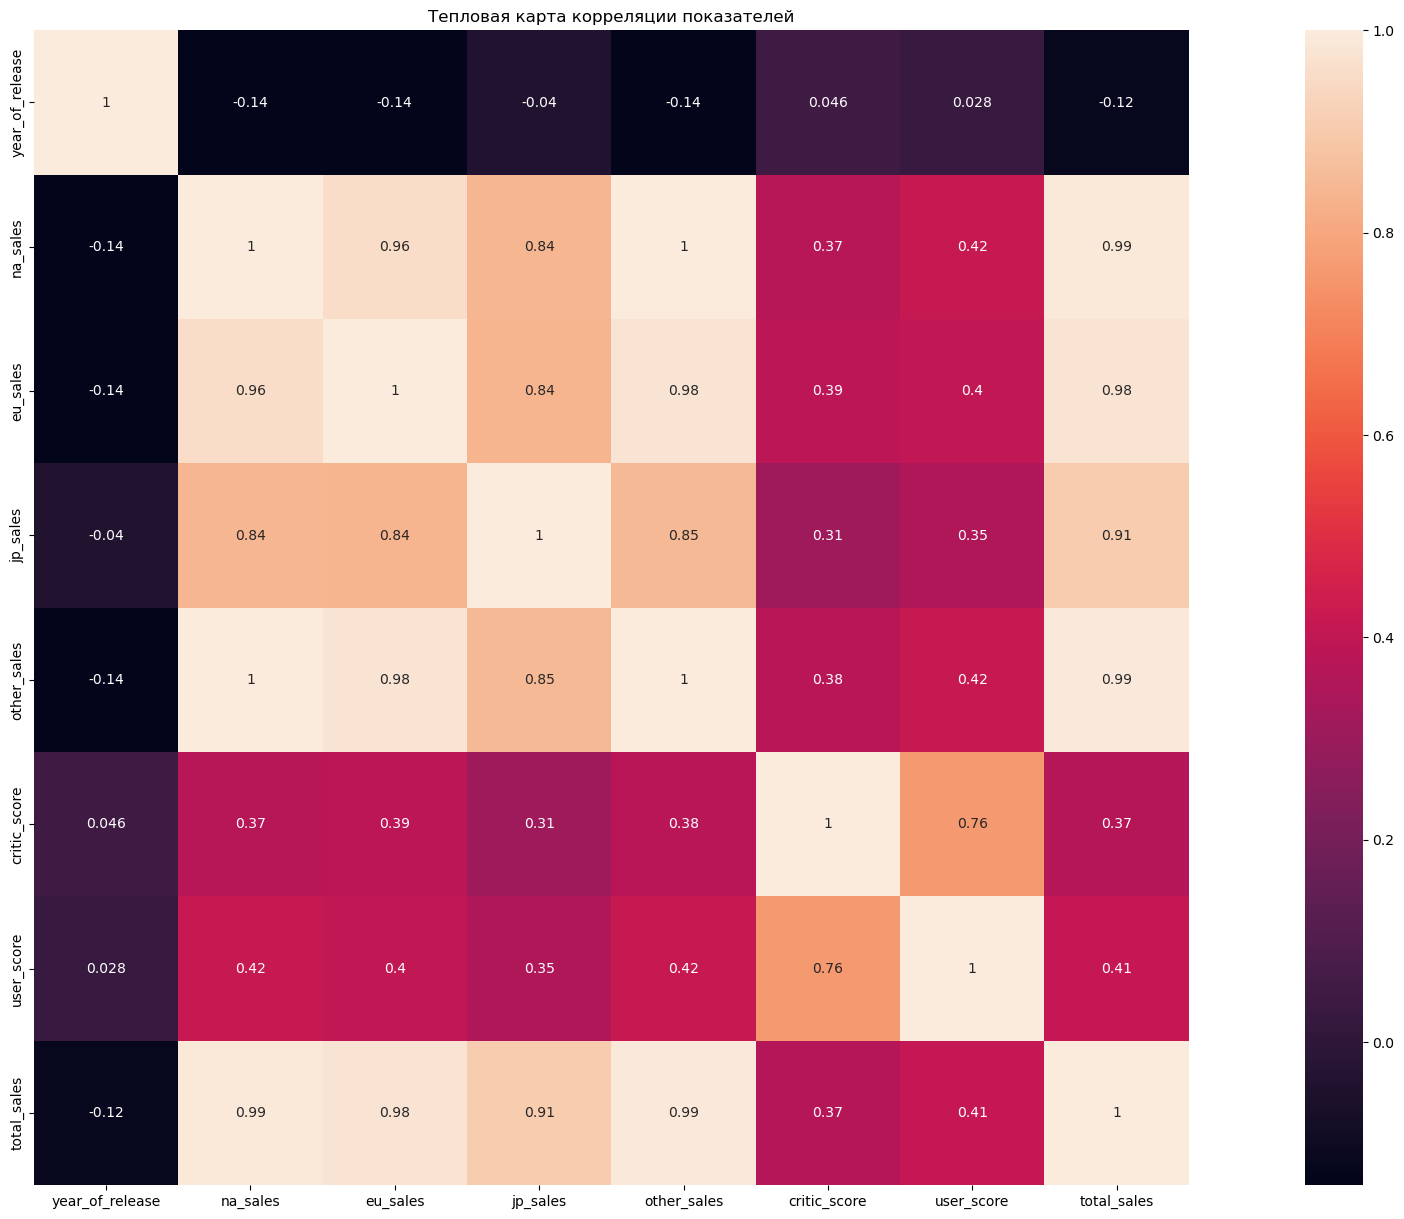

In [52]:
cm = df_3yr_wii.corr() #вычисляем матрицу корреляций
display(cm)
plt.figure(figsize=(30,15))
#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm,annot=True, square=True)
plt.title('Тепловая карта корреляции показателей')
plt.show()

На рынке игр для Wii ситуация еще интереснее, чем на рынках трех самых распространенных платформ. Здесь средне коррелированы продажи по всем регионам с пользовательскими оценками и оценками критиков (выше 0,31 для всех направлений).

При этом высокая положительная корреляция (более 0,8) наблюдается между продажами в Японии и на всех остальных рынках.

Скорее всего, это связано с особой нишевостью приставки, которая изначально имела отдельную особенность в виде своего необычного контроллера, а затем стала промежуточным звеном между GB и полноценной консолью (в версии Wii U). Впоследствии, в 2017 году, поддержка консоли была прекращена и она уступила место Nintendo Switch, которая объединила в себе Wii и GameBoy.

In [53]:
df_3yr_pc = df_3yr.query('platform_gen == "PC"')

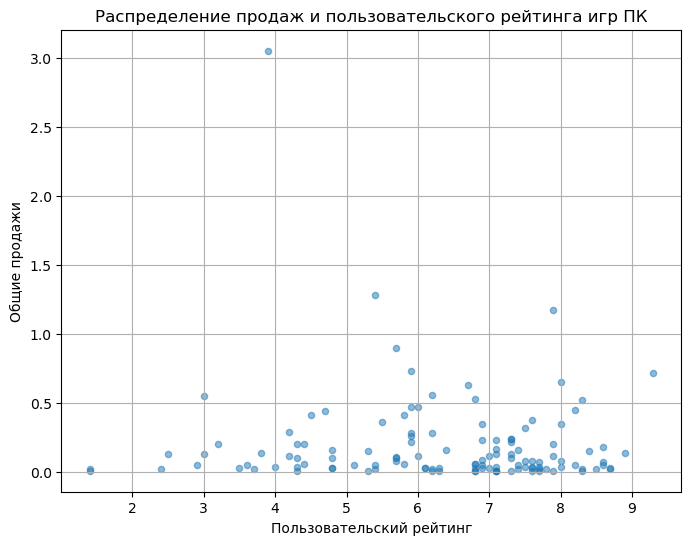

In [54]:
df_3yr_pc.plot(y='total_sales', x='user_score', kind='scatter', figsize=(8,6), grid=True, sharex=False, alpha=0.5)
plt.ylabel('Общие продажи')
plt.xlabel('Пользовательский рейтинг')
plt.title('Распределение продаж и пользовательского рейтинга игр ПК')
plt.show()

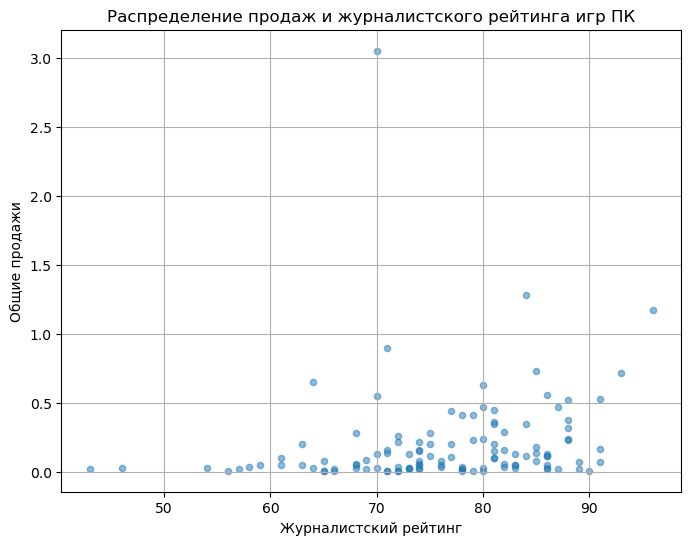

In [55]:
df_3yr_pc.plot(y='total_sales', x='critic_score', kind='scatter', figsize=(8,6), grid=True, sharex=False, alpha=0.5)
plt.ylabel('Общие продажи')
plt.xlabel('Журналистский рейтинг')
plt.title('Распределение продаж и журналистского рейтинга игр ПК')
plt.show()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.180865,-0.244653,NaN,-0.203378,-0.028895,-0.001107,-0.229381
na_sales,-0.180865,1.000000,0.829597,NaN,0.953769,0.186056,-0.081692,0.929170
eu_sales,-0.244653,0.829597,1.000000,NaN,0.949039,0.158962,-0.061836,0.977191
jp_sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
other_sales,-0.203378,0.953769,0.949039,NaN,1.000000,0.183201,-0.076442,0.991451
critic_score,-0.028895,0.186056,0.158962,NaN,0.183201,1.000000,0.466099,0.174634
user_score,-0.001107,-0.081692,-0.061836,NaN,-0.076442,0.466099,1.000000,-0.071597
total_sales,-0.229381,0.929170,0.977191,NaN,0.991451,0.174634,-0.071597,1.000000


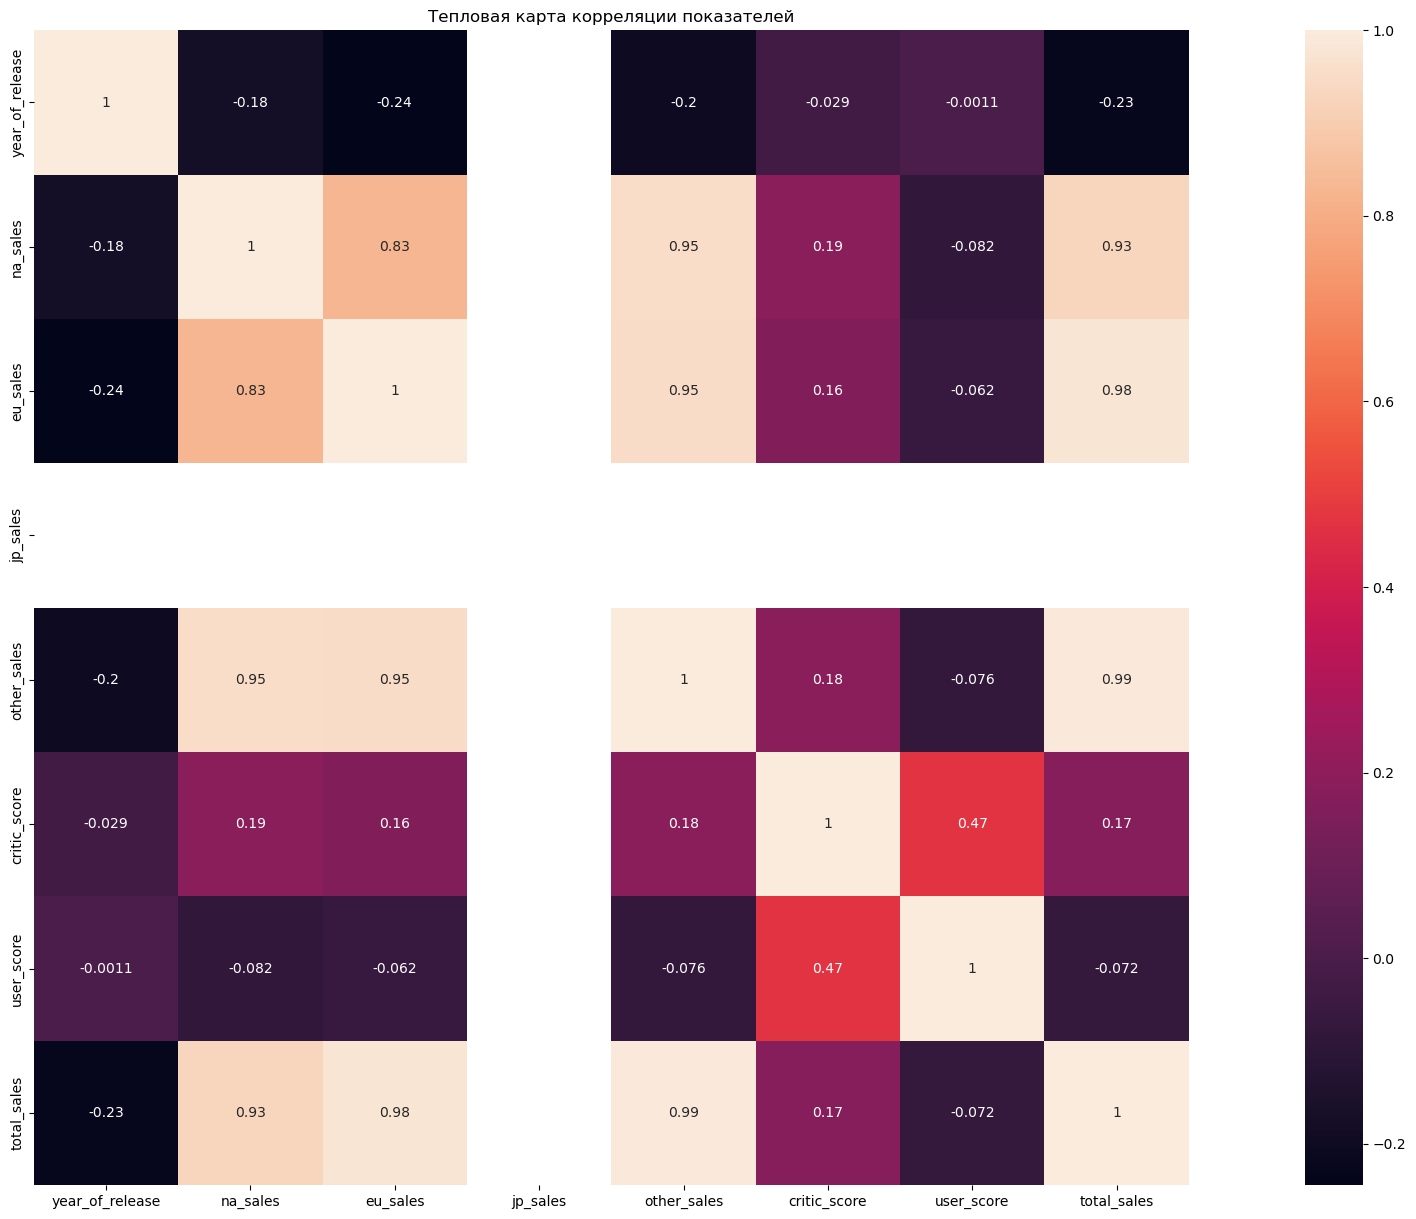

In [56]:
cm = df_3yr_pc.corr() #вычисляем матрицу корреляций
display(cm)
plt.figure(figsize=(30,15))
#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm,annot=True, square=True)
plt.title('Тепловая карта корреляции показателей')
plt.show()

Для игр на ПК картина, как указывалось выше, такова, что Япония поставила на платформе жирный крест (как видно на тепловой карте) - японцы не рассматривают ПК как игровую платформу по исторически сложившимся причинам.

В остальном же на продажи игр на ПК слабо положительно влияют оценки критиков, и практически не влияют оценки пользователей. Выходит, что игроки ПК максимально самостоятельные и не подвержены влиянию чьего-либо мнения при принятии решения, во что поиграть. 

С другой стороны, учитывая несравнимо малый размер рынка игр для ПК, эти факторы слабо влияют на что-либо в общей картине, и определяющими для рынка фактически остаются PlayStation, XBox и Nintendo.

### Портет игрока каждого региона на основе продаж игр

На основе имеющихся данных по продажам игр по регионам, жанрам, платформам и рейтингам мы можем определить примерный характерный портрет игрока для каждого региона. Более того, в исследовании выше уже отмечались особенности игроков в тех или иных регионах или на тех или иных платформах. Рассмотрим данные по каждому региону более детально и построим соответствующие диаграммы.

Первым делом выделим Топ-5 самых популярных жанров для каждого региона. Все остальные жанры определим как Other, итого получим шесть категорий.

In [57]:
piv_na=df_3yr.pivot_table(index='genre',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False).reset_index()
piv_na.columns=['genre','sales']
piv_jp=df_3yr.pivot_table(index='genre',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False).reset_index()
piv_jp.columns=['genre','sales']
piv_eu=df_3yr.pivot_table(index='genre',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False).reset_index()
piv_eu.columns=['genre','sales']

In [58]:
def gen_cat(row):
    gen = row['genre']
    if gen in top_gen:
        return gen
    else:
        return 'Other'

In [59]:
pivots=[piv_eu,piv_na,piv_jp]
for piv in pivots:
    top_gen = piv['genre'][:5].tolist()
    piv['gen_gen']=piv.apply(gen_cat,axis=1)
    piv= piv.pivot_table(index='gen_gen',values='sales',aggfunc='sum').reset_index()

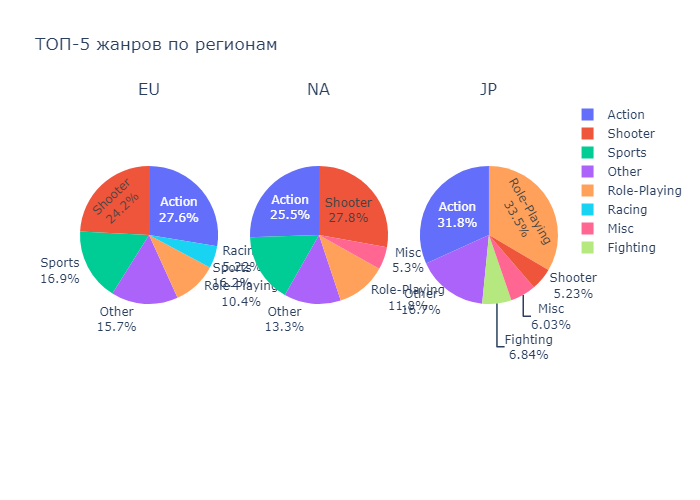

In [60]:
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}]],
                   subplot_titles=['EU', 'NA','JP'])


fig.add_trace(go.Pie(
     values=piv_eu['sales'],
     labels=piv_eu['gen_gen'],
     domain=dict(x=[0, 0.5])), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=piv_na['sales'],
     labels=piv_na['gen_gen'],
     domain=dict(x=[0.5, 1.0])),
    row=1, col=2)

fig.add_trace(go.Pie(
     values=piv_jp['sales'],
     labels=piv_jp['gen_gen'],
     domain=dict(x=[0.5, 1.0])),
    row=1, col=3)

fig.update_traces(textinfo='percent+label',hoverinfo='label+percent')
fig.update(layout_showlegend=True,layout_title_text='ТОП-5 жанров по регионам')
fig.show("png")

Как уже указывалось ранее, для каждого региона свойственны свои популярные жанры игр. В США на первом месте шутеры, на втором - экшн, на третьем - спорт, далее идут RPG и прочие игры.

В Европе на первом месте оказывается экшн, далее идут шутеры, спорт, RPG, гонки и прочие игры. Интересно то, что доли первых четырех самых популярных жанров в США и Европе примерно одинаковы, что говорит о том, что игроки и Старого и Нового Света во многом похожи друг на друга.

Японский рынок показывает напротив совершенно другие результаты. Здесь балом правят RPG (не зря есть отдельный жанр jRPG) и экшн. На третьем месте стоят файтинги, далее идут разные игры (скорее всего, сюда попадают визуальные новеллы и прочие подобные игры, характерные для этого рынка) и пятерку лидеров занимают шутеры. Это в очередной раз подчеркивает самобытность японского рынка, и то, что на нем, скорее всего, действуют другие правила.

In [61]:
piv_na=df_3yr.pivot_table(index='platform',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False).reset_index()
piv_na.columns=['platform','sales']
piv_jp=df_3yr.pivot_table(index='platform',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False).reset_index()
piv_jp.columns=['platform','sales']
piv_eu=df_3yr.pivot_table(index='platform',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False).reset_index()
piv_eu.columns=['platform','sales']

In [62]:
def plt_cat(row):
    gen = row['platform']
    if gen in top_gen:
        return gen
    else:
        return 'Other'

In [63]:
pivots=[piv_eu,piv_na,piv_jp]
for piv in pivots:
    top_gen = piv['platform'][:5].tolist()
    piv['plt_gen']=piv.apply(plt_cat,axis=1)
    piv= piv.pivot_table(index='plt_gen',values='sales',aggfunc='sum').reset_index()

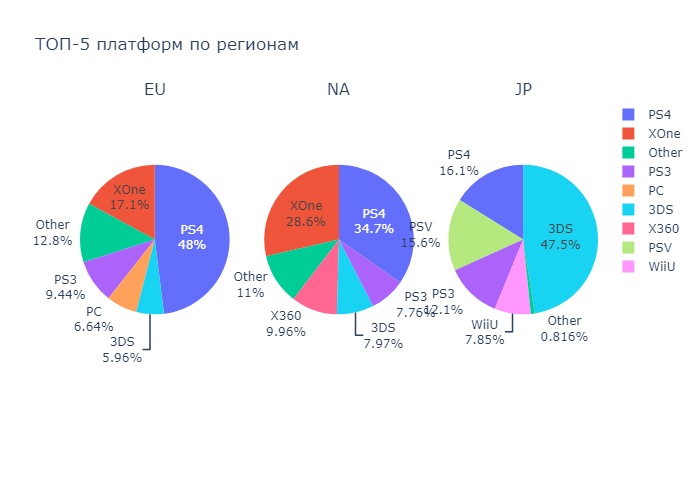

In [64]:
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}]],
                   subplot_titles=['EU', 'NA','JP'])


fig.add_trace(go.Pie(
     values=piv_eu['sales'],
     labels=piv_eu['plt_gen'],
     domain=dict(x=[0, 0.5])), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=piv_na['sales'],
     labels=piv_na['plt_gen'],
     domain=dict(x=[0.5, 1.0])),
    row=1, col=2)

fig.add_trace(go.Pie(
     values=piv_jp['sales'],
     labels=piv_jp['plt_gen'],
     domain=dict(x=[0.5, 1.0])),
    row=1, col=3)

fig.update_traces(textinfo='percent+label',hoverinfo='label+percent')
fig.update(layout_showlegend=True,layout_title_text='ТОП-5 платформ по регионам')
fig.show("png")

Снова, как и говорилось ранее, подтверждается лидерство PlayStation не только по обобщенному признаку, но и по флагманской приставке на момент сбора данных - PS4. Причем в Европе почти 50% продаж игр приходится на PS4 и только 17,1% на XBox One.

В США же напротив, доли двух конкурирующих флагманов практически равны (34,7% у PS4 против 28,6% у XBox), и при этом велика доля прошлого поколения XBox (еще 10%). Одновременно с этим, в Европе на 4 месте по популярности находится ПК, что не наблюдается больше ни на каком другом рынке.

Япония, как уже рассматривалось ранее, снова отличается от остального мира. Здесь очевидно доминирование портативных платформ (47,5% у Nintendo 3DS и 15,6% у PlayStation Vita), и общее доминирование платформ Nintendo и Sony (55.4% у Nintendo - 3DS и WiiU, 43,8% у Sony - PS4, PSv и PS3).

Таким образом, можно говорить о том, что в США и Европе доминирует "стационарный" гейминг, а в Японии - "портативный". Выше мы уже отмечали, что это может быть связано именно с национальными и культурными различиями, а также с общей площадью жилищ игроков, позволяющей или не позволяющей разместить у себя стационарное игровое место.

### Влияние рейтинга ESRB на продажи игр в регионах

Ранее мы уже рассматривали распределение игр по жанрам и регионам, однако не учиывали влияние рейтинга ESRB на продажи по регионам, платформам и жанрам. Поэтому, рассмотрим распределение значений этого рейтинга по регионам и жанрам, а затем - по платформам и жанрам без регионов. Для этого нам необходимо фактически рассмотреть сводную таблицу продаж по регионам и жанрам и выделить моду рейтинга для каждого из них.

In [65]:
pivot_3yr_esrb = df_3yr.pivot_table(index=['platform_gen'], values=['na_sales','eu_sales','jp_sales','other_sales','rating'], aggfunc={'na_sales':sum,'eu_sales':sum,'jp_sales':sum,'other_sales':sum,'rating':stats.mode}).reset_index()
pivot_3yr_esrb.columns=['platform', 'EU', 'Japan', 'North America','Other','ESRB']
pivot_3yr_esrb

,platform,EU,Japan,North America,Other,ESRB
0,GameBoy,16.12,44.24,22.64,3.68,no_ESRB
1,PC,17.97,0.00,7.23,1.85,M
2,PlayStation,159.11,41.14,123.18,55.66,no_ESRB
3,Wii,15.74,7.31,21.44,3.56,E10+
4,XBox,61.74,0.40,109.57,16.87,M


По таблице видно, что для платформ PlayStation и GameBoy самый распространенный рейтинг ESRB отсутствует. Учитывая ранее рассматривавшиеся портреты игроков, а также общий уровень продаж по платформе в разрезе региона, можно сказать, что игры GameBoy и PlayStation чаще не имеют американского рейтинга, и, скорее всего, на американском рынке такие игры не представлены вообще. На это влияет именно высокий уровень продаж платформ как в Европе, так и в Японии, где американский рейтинг не является определяющим. Скорее всего, только ААА-игры и тайтлы поменьше могут быть доступны для продажи в Штатах, и американскому игроку может быть недоступен весь спектр игр платформ.

В свою очередь, игры для ПК, XBox и Wii распространены достаточно и в США и во всем остальном мире, поэтому для них определяется наиболее распространенный рейтинг.

Дополнительно изучим, какие основные рейтинги характерны для платформ среди игр, которые проходили процедуру присвоения рейтинга ESRB.

In [66]:
pivot_3yr_esrb = df_3yr.query('rating != "no_ESRB"').pivot_table(index=['platform_gen'], values=['na_sales','eu_sales','jp_sales','other_sales','rating'], aggfunc={'na_sales':sum,'eu_sales':sum,'jp_sales':sum,'other_sales':sum,'rating':stats.mode}).reset_index()
pivot_3yr_esrb.columns=['platform', 'EU', 'Japan', 'North America','Other','ESRB']
pivot_3yr_esrb

,platform,EU,Japan,North America,Other,ESRB
0,GameBoy,7.16,11.00,9.32,1.50,E10+
1,PC,14.77,0.00,6.92,1.66,M
2,PlayStation,124.69,19.07,94.21,43.03,T
3,Wii,13.63,5.78,17.55,2.97,E10+
4,XBox,51.48,0.34,91.34,14.06,M


Здесь уже становится более-менее понятно, почему те или иные платформы имеют такие продажи в США. А также можно понять, на какую аудиторию ориентируется та или иная платформа.

Фактически, GameBoy и Wii - это "платформы для всей семьи", где самая распространенная игра с рейтингом Е10+ "Для всех от 10 лет и старше"

PlayStation чаще имеет рейтинг Teen (13+), и дает основания говорить, что платформа больше ориентирована на подростков.

ПК и XBox чаще продают игры категории М - для взрослых (17+), и соответственно, поэтому могут быть и ниже продажи на этих платформах: у целевой аудитории физически может не быть времени уделять играм столько времени, и уж тем более, тратить свои деньги на приобретение игр, имея множество других забот взрослого человека.

Для дальнейшего исследования построим матрицу зависимости продаж по регионам от рейтинга по модели Phi-K.

In [67]:
df_3yr_corr=df_3yr.phik_matrix(interval_cols=['na_sales','eu_sales','jp_sales','other_sales'])
df_3yr_corr=df_3yr_corr.drop(index=['name','platform','year_of_release','genre','total_sales','platform_gen'],columns=['name','platform','year_of_release','genre','total_sales','platform_gen'])
df_3yr_corr

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
na_sales,1.000000,0.688943,0.526505,0.861214,0.604037,0.599882,0.204332
eu_sales,0.688943,1.000000,0.383285,0.925492,0.283061,0.472071,0.173411
jp_sales,0.526505,0.383285,1.000000,0.322624,0.000000,0.575890,0.000000
other_sales,0.861214,0.925492,0.322624,1.000000,0.550122,0.340947,0.164322
critic_score,0.604037,0.283061,0.000000,0.550122,1.000000,0.906267,0.290813
user_score,0.599882,0.472071,0.575890,0.340947,0.906267,1.000000,0.082741
rating,0.204332,0.173411,0.000000,0.164322,0.290813,0.082741,1.000000


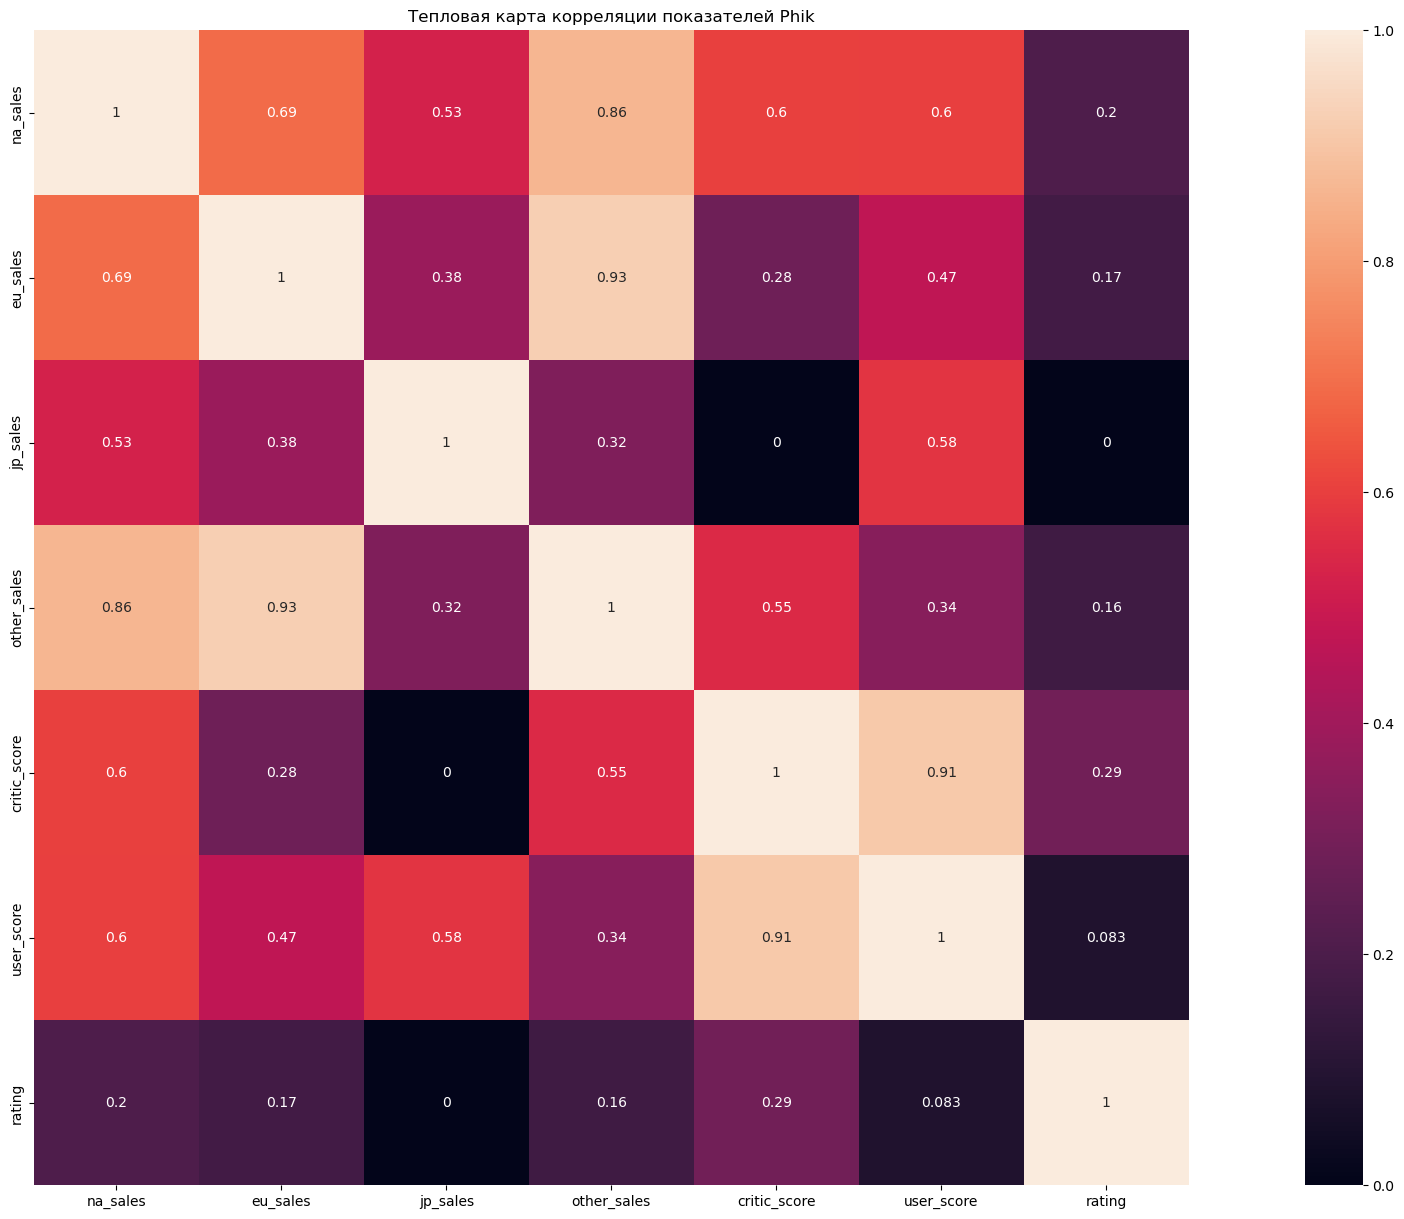

In [68]:
plt.figure(figsize=(30,15))
sns.heatmap(df_3yr_corr,annot=True, square=True)
plt.title('Тепловая карта корреляции показателей Phik')
plt.show()

Как видно на матрице корреляций, продажи в Японии вообще не коррелируют с рейтингом ESRB. Это вполне логично - японский национализм и протекционизм известны во многих сферах, поэтому рейтинг американской ассоциации не будет учитываться клиентами в стране.

Одновременно с этим, продажи по всем регионам показывают низкую зависимость от рейтингов ESRB, но только продажи в США имеют максимальную корреляцию с рейтингом ESRB. Остальные регионы реагируют на этот рейтинг слабо, поскольку аналогичные системы есть в различных странах и межгосударственных объединениях, и американские рейтинги в них скорее консультативны.

Дополнительно, матрица корреляций Phik подкрепила ранее высказанные выводы о влиянии оценок критиков и пользователей на продажи в различных регионах.

### Общие выводы по исследовательскому анализу данных

В проведенном исследовании было установлено, что игровой рынок менялся с течением времени, одновременно с развитием технологического прогресса. Поколения игровых приставок на заре игровой отрасли менялись каждые 10 лет, но ближе к нашей современной действительности жизненный цикл приставки уменьшается, и те же PlayStation меняют поколения уже каждые 6-8 лет.

Безоговорочными лидерами игрового рынка во всем мире кроме Японии являются PlayStation и XBox, в Японии же лидером является портативный GameBoy, а на втором месте идет PlayStation. Также примечательно, что ПК-игры в Японии совершенно не продаются.

Среди распределения игровых жанров также есть интересные особенности. И особняком здесь стоит Япония, где доминируют жанры экшн и RPG (притом сюда входят также и jRPG, очень популярные в стране), а в остальных странах пальму первенства держат шутеры, экшны и спортивные игры.

Также и распределение жанров по платформам интересно тем, что дополняет собой распределение популярных жанров по регионам: для GameBoy достаточно много RPG и экшнов, а приставка популярная в Японии - это и отражается в итоговых продажах игр на рынке.

При последующем исследовании было установлено, что отзывы критиков средне положительно коррелируют с продажами во всех регионах. В свою очередь, пользовательские отзывы практически не имеют влияния на продажи во всех регионах. Однако, влияние отзывов критиков имеет разное влияние на продажи игр в зависимости от платформы. Игроки ПК и XBox более независимы в принятии решений, в то время как для GameBoy и Wii оценки критиков более значимы в принятии решения о покупке. Также интересно, что на всех платформах (кроме ПК) японские игроки прислушиваются к мнению других игроков, и только для них коэффициент корреляции продаж и пользовательских рейтингов положителен.

Определили характерные особенности игроков трех основных рынков - Европы, США и Японии. Японские геймеры предпочитают портативные платформы, а также ориентируются на местного производителя (Sony и Nintendo). Среди жанров игр они предпочитают RPG и Adventure, и чуть меньше файтинги и остальные жанры. Игроки Старого Света распределяются примерно поровну между PlayStation и XBox, с небольшим перевесом в сторону первой. Предпочитают шутеры, экшны, спортивные игры. Пользователи Европы больше тяготеют к PlayStation и предпочитают экшны чуть больше, чем шутеры. На третьем месте у них, как и в США, спорт, а на четвертом и пятом местах - RPG и гонки.

Также был определен наиболее характерный рейтинг ESRB для каждой платформы. Сопоставление полученных данных и продаж по платформам и жанрам позволяет понять глубинные причины именно такого распределения, которые кроются именно в возрастном позиционировании каждой приставки. К примеру,  GameBoy и Wii имеют больше игр "для всей семьи", и поэтому они ориентированы на эту возрастную категорию. PlayStation ориентирована больше на подростков, а с учетом общемировых тенденций в изменении среднего возраста населения (не считая беднейших стран), число подростков с каждым годом пока еще становится больше, а рождаемость уменьшается. Так же и ПК с XBox, они позиционируются как платформы для более зрелой аудитории, а у таких людей уже не остается достаточно времени на игры, да и приобретение игр для старшей возрастной категории уже не становится приоритетом и может быть отложено в пользу более важных потребностей.

Плюс ко всему, было установлено, что рейтинг ESRB абсолютно неважен для игроков в Японии и практически не имеет влияния на игроков Европы и остального мира. Это логично, поскольку ESRB - это исключительно североамериканский рейтинг, и в остальных регионах он может быть своим собственным, поэтому на их продажи он не будет иметь особого влияния, равно как и будет делать доступными некоторые игры, недоступные игрокам в США.

## Проверка статистических гипотез

На продажи игр может влиять множество различных факторов. Однако, как уже упоминалось ранее, уже была отслежена особенность того, что игры для ПК и XBox чаще всего имеют рейтинг М (Mature). Есть предположение, что рейтинги у игр на этих двух платформах могут быть одинаковыми. А ввиду того, что приставка XBox One получала игры практически одновременно с ПК, при этом XBox принадлежит Microsoft, и сама приставка на момент выхода оказывалась на уровне мощных игровых ПК.

Для этого рассмотрим гипотезу о том, что средние рейтинги игр на XBox One (самая свежая приставка в датасете) и ПК одинаковы (альтернативная гипотеза: средние рейтинги на XBox One и ПК разные).

Второй фактор, который мы рассмотрим, это зависимость рейтинга игр от жанра. Разные жанры игр могут иметь разные средние рейтинги, причем не только ввиду их разного качества, но и ввиду разного количества выходящих в этих жанрах игр.

Для примера возьмем два абсолютно непохожих жанра: экшн и спортивные игры, и рассмотрим гипотезу о том, что средние пользовательские рейтинги игр этих жанров разные (альтернативная гипотеза: средние пользовательские рейтинги экшн и спортивных игр равны).

### Гипотеза о равенстве средних пользовательских рейтингов XBox One и ПК

Начнем с рассмотрения гипотезы о равенстве средних пользовательских рейтингов на ПК и XBox One. Будем использовать уже отобранные данные за 2014-2016 годы.

```
H_0: Средний пользовательский рейтинг (user_score) игр ПК = Средний пользовательский рейтинг (user_score) игр XBox One
H_a: Средний пользовательский рейтинг (user_score) игр ПК ≠ Средний пользовательский рейтинг (user_score) игр XBox One
alpha = 0.05
```

Поскольку рассматривается равенство или неравенство средних значений двух выборок, будем использовать двусторонний тест Стьюдента (t-test).

In [69]:
alpha = 0.05 # уровень статистической значимости
sample_1 = df_3yr[df_3yr['platform'] =='PC']['user_score']
sample_2 = df_3yr[df_3yr['platform'] =='XOne']['user_score']

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(sample_1, sample_2, equal_var=False, nan_policy='omit') #поскольку в данных есть пропуски - не включаем их в тесте

# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

0.11601398086668943
Не получилось отвергнуть нулевую гипотезу


Для иллюстрации построим сводную таблицу средних и медианных значений рейтингов для платформ.

In [70]:
df_3yr.query('platform == "XOne" or platform == "PC"').pivot_table(index=['platform'],values=['user_score'],aggfunc={'mean','median'})

user_score       
               mean median
platform                  
PC         6.298361    6.8
XOne       6.594545    6.8

Как показывает сводная таблица, медианные пользовательские рейтинги двух платформ равны. Средние рейтинги практически равны и немного выше для Xbox. Есть вероятность, что это может быть связано с тем, что в последнее время среди игр для ПК часто встречались случаи некачественной оптимизации и неотлаженного управления, а это в свою очередь могло тянуть за собой снижение пользовательских рейтингов. Однако для того, чтобы с уверенностью говорить об этом, необходимо более детальным образом исследовать причины успеха или неудачи той или иной игры.

Проверка гипотезы показывает, что средние пользовательские рейтинги на XBox One и ПК статистически, скорее всего, не отличаются. 

Это может говорить о том, что качество игр на XBox One и ПК примерно одинаково, и игроки примерно одинаково оценивают игры, выходящие на этих двух платформах. Учитывая ранее рассматривавшиеся наиболее часто встречающиеся возрастные рейтинги этих двух платформ, можно предположить, что игры на них могут позиционироваться для примерно похожих аудиторий и ориентироваться на их предпочтения и ожидания.

Однако, подобное статистическое равенство выборок не может приниматься как факт того, что рейтинги игр на ПК и XBox обязательно будут равны. Они могут быть равны, а могут и не быть равны по тем или иным косвенным причинам (например, оптимизация графики, управления, иные особенности).

Равенство выборок говорит о том, что скорее всего рейтинги будут равны или близки к равным, но это не обязательно будет так для всех игр двух платформ.

### Гипотеза о неравенстве средних пользовательских рейтингов жанров Action и RPG

Аналогично будем использовать данные по играм за 2014-2016 годы. Дополнительно проведем исследование на выборке за все время существования рынка игр.

Будем использовать Т-тест, поскольку имеем двустороннюю гипотезу о равенстве или неравенстве двух средних.

```
H_0: Средний пользовательский рейтинг (user_score) игр Action = Средний пользовательский рейтинг (user_score) игр Sports
H_a: Средний пользовательский рейтинг (user_score) игр Action ≠ Средний пользовательский рейтинг (user_score) игр Sports
alpha = 0.05
```

In [71]:
alpha = 0.05 # уровень статистической значимости
sample_1 = df_3yr[df_3yr['genre'] =='Action']['user_score']
sample_2 = df_3yr[df_3yr['genre'] =='Sports']['user_score']

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(sample_1, sample_2, equal_var=False, nan_policy='omit') #поскольку в данных есть пропуски - не включаем их в тесте

# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

1.182555038264477e-14
Отвергаем нулевую гипотезу


In [72]:
alpha = 0.05 # уровень статистической значимости
sample_1 = df[df['genre'] =='Action']['user_score']
sample_2 = df[df['genre'] =='Sports']['user_score']

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(sample_1, sample_2, equal_var=False, nan_policy='omit') #поскольку в данных есть пропуски - не включаем их в тесте

# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

0.07751671595537009
Не получилось отвергнуть нулевую гипотезу


Аналогично прошлому пункту построим сводную таблицу рейтингов для рассматриваемых жанров.

In [73]:
df_3yr.query('genre == "Action" or genre == "Sports"').pivot_table(index=['genre'],values=['user_score'],aggfunc={'mean','median'})

user_score       
             mean median
genre                   
Action   6.760606    7.1
Sports   5.225197    5.5

Действительно, средние и медианные оценки двух жанров отличаются. Причем, если средние значения отличаются на 1.5, то медианные - на 1.6. Разница в обоих случаях разительная.

In [74]:
df.query('genre == "Action" or genre == "Sports"').pivot_table(index=['genre'],values=['user_score'],aggfunc={'mean','median'})

user_score       
             mean median
genre                   
Action   7.058129    7.4
Sports   6.952778    7.4

На выборке за все время существования рынка игр, средняя и медианная оценка игр разных жанров действительно практически одинакова.

Получается интересная ситуация. На выборке за ближайшие 3 года (с 2014 по 2016 год) гипотеза о равенстве рейтингов спортивных и экшн-игр отвергается, и таким образом предположение о том, что экшны скорее всего будут иметь иные средние рейтинги пользователей, чем спортивные игры, подкрепляется этим тестом.

С другой стороны на всей выборке за всё время существования игрового рынка тест показывает, что средние рейтинги спортивных и экшн-игр скорее всего равны. Это может быть вызвано великим множеством причин. Может оказаться так, что спортивные игры со временем ухудшились или улучшились, а экшны остались прежними. Может оказаться так, что экшны со временем ухудшились (а по личному опыту геймера я могу предположить, что это так: хороших игр становится меньше, и все больше "проходняка"), а спортивные игры улучшились.

Поэтому очень важно выбирать горизонт анализа гипотез для того, чтобы не получить в результате некорректные данные и чтобы не принять на их основании неверных решений.

### Общие выводы по проверке статистических гипотез

В свете того, что перед нами стоит задача проверки равенства средних пользовательских оценок игр различных платформ и жанров, в обоих случаях были сформированы нулевые гипотезы о равенстве средних, и альтернативные - об их различии. Но, поскольку в первом случае мы рассматриваем именно предположение о равенстве оценок, мы должны принять нулевую гипотезу, а во втором случае, где мы рассматриваем предположение о том, что оценки разных жанров разные, мы должны отвергнуть нулевую гипотезу. В обоих случаях необходимо получить обоснование для подобного.

Поскольку рассматриваются именно гипотезы о равенстве, был выбран для проверки t-test (тест Стьюдента) для двух независимых выборок с критерием значимости (alpha) 5%. Таким образом, получается достаточно серьезно сократить возможность ошибки, но принятие той или иной гипотезы не будет означать того, что она будет применима к абсолютно всем наблюдениям. 

По итогам проведенного исследования было подтверждено предположение о том, что средние рейтинги пользователей для игр на ПК и XBox скорее всего равны, что дополняет предположение о том, что игры этих двух платформ ориентированы приблизительно на одну аудиторию (но это не является абсолютным и может различаться случайным образом).

Также было подтверждено предположение, что на коротком рассматриваемом промежутке с 2014 по 2016 год рейтинги игр жанров Action и Sports скорее всего различаются. Однако при этом за все время существования игрового рынка средние рейтинги этих жанров оказываются скорее равны, и это может говорить как о серьезных изменениях в разработке игр, так и об изменении предпочтений игроков.

## Итоговые выводы

По итогам проведенного исследования было установлено, что для изучения игрового рынка в современных условиях необходимо выбирать небольшие временн*ы*е промежутки для исследования, поскольку изменяются поколения "железа", формируются новые подходы к разработке игр, меняются предпочтения игроков и рынка.

Было определено, что для прогнозирования продаж на будущий период необходимо брать предыдущие 2-3 года, и очень внимательно подходить к анализу как таковому.

Установили, что японский игровой рынок кардинально отличается от остального мира: в нем преобладают иные жанры игр и иные платформы, нежели чем в остальном мире. Если весь мир предпочитает шутеры и экшны, то японцы предпочитают RPG и экшны.

Аналогичная ситуация с платформами и их распределением в мировом рынке. Здесь также отличается Япония: японцы не играют на ПК, и практически не играют в XBox, самая популярная платформа - портативный GameBoy. Мировой лидер платформ - PlayStation - здесь на втором месте. В это же время во всем остальном мире PlayStation - лидер, следом за ней идет XBox, далее следуют GB и Wii, и всего несколько процентов приходится на ПК.

При этом в рассмотренном периоде продажи игр на всех рынках имеют среднюю корреляцию с оценками критиков, то есть критики и журналисты могут в определенной степени влиять на продажи игр. При этом нигде кроме Японии пользовательский рейтинг практически ничего не значит. Японцы же, в свою очередь, могут прислушиваться и к журналистам/критикам, и к другим игрокам и формировать свои решения. Выделяются пользователи ПК - они не верят ни тем, ни другим. Но доля продаж игр на ПК в мировом рынке низка, поэтому на общую картину это не оказывает влияния.

Рейтинги ESRB дополнительно показали, что наиболее распространенные игры по возрастному рейтингу для разных платформ разные. Они минимально влияют на продажи по всему миру (чуть больше в США, чем в остальных странах) и никак не влияют на продажи в Японии, где есть своя рейтинговая система.

В части различия между средними пользовательскими рейтингами, было установлено, что для XBox One и ПК средние пользовательские рейтинги скорее одинаковы. А при сравнении средних рейтингов различных жанров было установлено, что в коротком периоде (в нашем случае с 2014 по 2016 годы) рейтинги разных жанров скорее всего отличаются, но за весь период они скорее одинаковы. Это может быть вызвано различными изменениями как в игровых механиках, так и в общем качестве конечного продукта, либо некими другими неявными причинами.

По итогам проведенного исследования для его целей (формирование прогноза продаж на 2017 год или любой другой период в будущем) и прогнозирования продаж необходимо использовать при планировании следующие параметры:
* Жанр игры. Для разных платформ разные популярные жанры, а также и для разных регионов
* Платформа игры. Абсолютные лидеры в мире (кроме Японии) PlayStation и XBox, в Японии - GameBoy и PlayStation
* Оценка игры критиками. С большой вероятностью комплиментарные рейтинги критиков/журналистов повлияют на высокие продажи игры
* Для США, Европы и остального мира следует принимать во внимание возрастной рейтинг, игры "для взрослых" могут лишиться части аудитории в этих странах

Эти факторы не являются единственными для любой конкретной игры, поскольку ценовая политика различных разработчиков и платформ может различаться. Поэтому для более детального прогноза надо в том числе учитывать цену игры на разных платформах и в разных регионах. В таком случае планирование будущего периода будет более эффективным и приближенным к реальности.